# SOLUTIONS: Advanced ML Week 1, Lecture 1: Working with and Preparing Text Data

> WARNING: NEEDS UPDATING TO 100% MATCH FINAL AMAZON VERSION OF LECTURE 1

In [1]:
from IPython.display import display, Markdown
with open("../Data-AmazonReviews/Amazon Product Reviews.md") as f:
    display(Markdown(f.read()))

# Amazon Product Reviews

- URL: https://cseweb.ucsd.edu/~jmcauley/datasets.html#amazon_reviews 

## Description

This is a large crawl of product reviews from Amazon. This dataset contains 82.83 million unique reviews, from around 20 million users.

## Basic statistics

| Ratings:  | 82.83 million        |
| --------- | -------------------- |
| Users:    | 20.98 million        |
| Items:    | 9.35 million         |
| Timespan: | May 1996 - July 2014 |

## Metadata

- reviews and ratings
- item-to-item relationships (e.g. "people who bought X also bought Y")
- timestamps
- helpfulness votes
- product image (and CNN features)
- price
- category
- salesRank

## Example

```
{  "reviewerID": "A2SUAM1J3GNN3B",  "asin": "0000013714",  "reviewerName": "J. McDonald",  "helpful": [2, 3],  "reviewText": "I bought this for my husband who plays the piano.  He is having a wonderful time playing these old hymns.  The music  is at times hard to read because we think the book was published for singing from more than playing from.  Great purchase though!",  "overall": 5.0,  "summary": "Heavenly Highway Hymns",  "unixReviewTime": 1252800000,  "reviewTime": "09 13, 2009" }
```

## Download link

See the [Amazon Dataset Page](https://cseweb.ucsd.edu/~jmcauley/datasets/amazon_v2/) for download information.

The 2014 version of this dataset is [also available](https://cseweb.ucsd.edu/~jmcauley/datasets/amazon/links.html).

## Citation

Please cite the following if you use the data:

**Ups and downs: Modeling the visual evolution of fashion trends with one-class collaborative filtering**

R. He, J. McAuley

*WWW*, 2016
[pdf](https://cseweb.ucsd.edu/~jmcauley/pdfs/www16a.pdf)

**Image-based recommendations on styles and substitutes**

J. McAuley, C. Targett, J. Shi, A. van den Hengel

*SIGIR*, 2015
[pdf](https://cseweb.ucsd.edu/~jmcauley/pdfs/sigir15.pdf)

In [2]:
## Import necessary packages
import pandas as pd
import nltk
import os, glob, json

# Load the Data

We will download our **corpus** of reviews.

In [3]:
os.listdir("../Data-AmazonReviews/")

['amazon-reviews-video-games-combined.csv.gz',
 'processed_data.joblib',
 'processed_data.csv',
 'amazon-reviews-home-ktichen_hoover.csv',
 '.ipynb_checkpoints',
 'amazon-reviews-with-metadata-home-kitchen.csv.gz',
 'Amazon Product Reviews.md']

In [4]:
fpath_reviews = "../Data-AmazonReviews/amazon-reviews-with-metadata-home-kitchen.csv.gz"
# fpath_reviews = "../Data-AmazonReviews/amazon-reviews-video-games-combined.csv.gz


In [5]:
## Download corpus of tweets
df_full = pd.read_csv(fpath_reviews)
df_full.head(10)

,asin,reviewerID,date,reviewText,summary,overall,title,brand,main_cat,description,feature,category,imageURL
0,B000067DW6,A6VPIOPMDJ8H7,2005-05-28,"In my recently deleted review, I praised these...",A shadow of a once-great product,2.0,"PUR Basic Water Pitcher Replacement Filter, 2-...",PUR,Amazon Home,"['Replacement Filter Cartridge, 2-11/16x2-11/1...","[""PUR BASIC WATER FILTER REPLACEMENT: PUR's Ba...","['Home & Kitchen', 'Kitchen & Dining', 'Water ...",['https://images-na.ssl-images-amazon.com/imag...
1,B000067DW6,A2CBZMETQJTNEE,2005-01-01,"I lived in Peru, in the Andes where it was imp...","What once was a good filter is now, basicly, w...",1.0,"PUR Basic Water Pitcher Replacement Filter, 2-...",PUR,Amazon Home,"['Replacement Filter Cartridge, 2-11/16x2-11/1...","[""PUR BASIC WATER FILTER REPLACEMENT: PUR's Ba...","['Home & Kitchen', 'Kitchen & Dining', 'Water ...",['https://images-na.ssl-images-amazon.com/imag...
2,B000067DW6,A2ZR3YTMEEIIZ4,2003-10-03,Pur makes water filters for campers and backpa...,"Pur over Brita, and neither softens water.",5.0,"PUR Basic Water Pitcher Replacement Filter, 2-...",PUR,Amazon Home,"['Replacement Filter Cartridge, 2-11/16x2-11/1...","[""PUR BASIC WATER FILTER REPLACEMENT: PUR's Ba...","['Home & Kitchen', 'Kitchen & Dining', 'Water ...",['https://images-na.ssl-images-amazon.com/imag...
3,B000067DW6,A1IPFGQ9EH8BGL,2018-05-06,We've tried both flavors. Pur's basic filter w...,"Pur's Lead Filter Takes Forever To Work, Doesn...",2.0,"PUR Basic Water Pitcher Replacement Filter, 2-...",PUR,Amazon Home,"['Replacement Filter Cartridge, 2-11/16x2-11/1...","[""PUR BASIC WATER FILTER REPLACEMENT: PUR's Ba...","['Home & Kitchen', 'Kitchen & Dining', 'Water ...",['https://images-na.ssl-images-amazon.com/imag...
4,B000067DW6,A3668U9GFM4II9,2018-05-03,Finally got around to using these and they are...,LEAK,1.0,"PUR Basic Water Pitcher Replacement Filter, 2-...",PUR,Amazon Home,"['Replacement Filter Cartridge, 2-11/16x2-11/1...","[""PUR BASIC WATER FILTER REPLACEMENT: PUR's Ba...","['Home & Kitchen', 'Kitchen & Dining', 'Water ...",['https://images-na.ssl-images-amazon.com/imag...
5,B000067DW6,A168EZ6357ACMG,2018-05-01,as advertised and on time!,Five Stars,5.0,"PUR Basic Water Pitcher Replacement Filter, 2-...",PUR,Amazon Home,"['Replacement Filter Cartridge, 2-11/16x2-11/1...","[""PUR BASIC WATER FILTER REPLACEMENT: PUR's Ba...","['Home & Kitchen', 'Kitchen & Dining', 'Water ...",['https://images-na.ssl-images-amazon.com/imag...
6,B000067DW6,A19UUX709H8MTI,2018-04-28,Switched to Aquacrest filters because they are...,More Expensive and Spread More Carbon Than Kno...,3.0,"PUR Basic Water Pitcher Replacement Filter, 2-...",PUR,Amazon Home,"['Replacement Filter Cartridge, 2-11/16x2-11/1...","[""PUR BASIC WATER FILTER REPLACEMENT: PUR's Ba...","['Home & Kitchen', 'Kitchen & Dining', 'Water ...",['https://images-na.ssl-images-amazon.com/imag...
7,B000067DW6,AWDURRGBMK7LR,2018-04-25,"Water stops flowing every time, requiring the ...",Water stops flowing every time,1.0,"PUR Basic Water Pitcher Replacement Filter, 2-...",PUR,Amazon Home,"['Replacement Filter Cartridge, 2-11/16x2-11/1...","[""PUR BASIC WATER FILTER REPLACEMENT: PUR's Ba...","['Home & Kitchen', 'Kitchen & Dining', 'Water ...",['https://images-na.ssl-images-amazon.com/imag...
8,B000067DW6,A32QO1EGR8HQFP,2018-04-24,I ordered the filter and sadly when I added th...,I was very disappointed.,1.0,"PUR Basic Water Pitcher Replacement Filter, 2-...",PUR,Amazon Home,"['Replacement Filter Cartridge, 2-11/16x2-11/1...","[""PUR BASIC WATER FILTER REPLACEMENT: PUR's Ba...","['Home & Kitchen', 'Kitchen & Dining', 'Water ...",['https://images-na.ssl-images-amazon.com/imag...
9,B000067DW6,A3KEQ19CTTMR4J,2018-04-23,4 stars here... It works as it should be can't...,Good filter just a bit pricey,4.0,"PUR Basic Water Pitcher Replacement Filter, 2-...",PUR,Amazon Home,"['Replacement Filter Cartridge, 2-11/16x2-11/1...","[""PUR BASIC WATER FILTER REPLACEMENT: PUR's Ba..."

In [6]:
use_cols = ['reviewText','summary','overall','brand','title']
df_full = df_full[use_cols]
df_full

,reviewText,summary,overall,brand,title
0,"In my recently deleted review, I praised these...",A shadow of a once-great product,2.0,PUR,"PUR Basic Water Pitcher Replacement Filter, 2-..."
1,"I lived in Peru, in the Andes where it was imp...","What once was a good filter is now, basicly, w...",1.0,PUR,"PUR Basic Water Pitcher Replacement Filter, 2-..."
2,Pur makes water filters for campers and backpa...,"Pur over Brita, and neither softens water.",5.0,PUR,"PUR Basic Water Pitcher Replacement Filter, 2-..."
3,We've tried both flavors. Pur's basic filter w...,"Pur's Lead Filter Takes Forever To Work, Doesn...",2.0,PUR,"PUR Basic Water Pitcher Replacement Filter, 2-..."
4,Finally got around to using these and they are...,LEAK,1.0,PUR,"PUR Basic Water Pitcher Replacement Filter, 2-..."
...,...,...,...,...,...
110207,This tumbler is just as good as a Yeti tumbler...,Amazing product and one that anyone would appr...,5.0,RTIC,RTIC 30 oz Stainless Steel Tumbler Cup w/ Spla...
110208,This is an amazing cup. Use it daily. Drapela ...,Cold forever,5.0,RTIC,RTIC 30 oz Stainless Steel Tumbler Cup w/ Spla...
110209,I bought two of these and they work great. Jus...,Keeps Ice All Day...and Longer,5.0,RTIC,RTIC 30 oz Stainless Steel Tumbler Cup w/ Spla...
110210,"Buy direct from RTIC, awesome cup!",Love!,5.0,RTIC,RTIC 30 oz Stainless Steel Tumbler Cup w/ Spla...


# Some light EDA

In [7]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110212 entries, 0 to 110211
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   reviewText  110212 non-null  object 
 1   summary     110189 non-null  object 
 2   overall     110212 non-null  float64
 3   brand       110212 non-null  object 
 4   title       110212 non-null  object 
dtypes: float64(1), object(4)
memory usage: 4.2+ MB


In [8]:
df_full.duplicated().sum()

5486

In [9]:
df_full = df_full.drop_duplicates()
df_full.duplicated().sum()

0

In [10]:
df_full['text'] = df_full['summary'] + ": " + df_full['reviewText']
df_full

/var/folders/rf/vw4r41jd7vd95x1w0dth7v9h0000gp/T/ipykernel_5488/3881565985.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_full['text'] = df_full['summary'] + ": " + df_full['reviewText']


,reviewText,summary,overall,brand,title,text
0,"In my recently deleted review, I praised these...",A shadow of a once-great product,2.0,PUR,"PUR Basic Water Pitcher Replacement Filter, 2-...",A shadow of a once-great product: In my recent...
1,"I lived in Peru, in the Andes where it was imp...","What once was a good filter is now, basicly, w...",1.0,PUR,"PUR Basic Water Pitcher Replacement Filter, 2-...","What once was a good filter is now, basicly, w..."
2,Pur makes water filters for campers and backpa...,"Pur over Brita, and neither softens water.",5.0,PUR,"PUR Basic Water Pitcher Replacement Filter, 2-...","Pur over Brita, and neither softens water.: Pu..."
3,We've tried both flavors. Pur's basic filter w...,"Pur's Lead Filter Takes Forever To Work, Doesn...",2.0,PUR,"PUR Basic Water Pitcher Replacement Filter, 2-...","Pur's Lead Filter Takes Forever To Work, Doesn..."
4,Finally got around to using these and they are...,LEAK,1.0,PUR,"PUR Basic Water Pitcher Replacement Filter, 2-...",LEAK: Finally got around to using these and th...
...,...,...,...,...,...,...
110206,Better than a Yeti,Better than a Yeti,5.0,RTIC,RTIC 30 oz Stainless Steel Tumbler Cup w/ Spla...,Better than a Yeti: Better than a Yeti
110207,This tumbler is just as good as a Yeti tumbler...,Amazing product and one that anyone would appr...,5.0,RTIC,RTIC 30 oz Stainless Steel Tumbler Cup w/ Spla...,Amazing product and one that anyone would appr...
110208,This is an amazing cup. Use it daily. Drapela ...,Cold forever,5.0,RTIC,RTIC 30 oz Stainless Steel Tumbler Cup w/ Spla...,Cold forever: This is an amazing cup. Use it d...
110209,I bought two of these and they work great. Jus...,Keeps Ice All Day...and Longer,5.0,RTIC,RTIC 30 oz Stainless Steel Tumbler Cup w/ Spla...,Keeps Ice All Day...and Longer: I bought two o...


In [11]:
# df_full['title-short'] = df_full['title'].map(lambda x: x[:40])

### Selecting a Subset

In [12]:
df_full['brand'].value_counts()

Instant Pot              8864
Hoover                   8193
Contigo                  7353
Cuisinart                5848
Pinzon by Amazon         5816
New Metro Design         5704
Thermos                  5224
Ozeri                    4409
Hamilton Beach           3968
Clara Clark              3872
Coop Home Goods          3697
Bissell                  3392
RTIC                     3271
Aroma Housewares         3196
InterDesign              3109
HC COLLECTION            3078
Zinus                    2752
Himalayan Glow           2663
Eureka                   2610
Lodge                    2470
Zyliss                   2246
Presto                   2205
BLACK+DECKER             2203
PUR                      1991
Keurig                   1880
SleepBetter              1759
American Weigh Scales    1501
Swissmar                 1452
Name: brand, dtype: int64

In [13]:
overall_by_brand_counts = df_full.groupby('brand')['overall'].value_counts().unstack(1)
overall_by_brand_counts.head()

overall,1.0,2.0,3.0,4.0,5.0
brand,,,,,
American Weigh Scales,78,49,87,208,1079
Aroma Housewares,194,165,202,520,2115
BLACK+DECKER,126,94,143,336,1504
Bissell,175,154,188,489,2386
Clara Clark,209,192,350,518,2603


In [14]:
# Finding brands with the most one-star reviews
overall_by_brand_counts.sort_values(1.0, ascending=False)

overall,1.0,2.0,3.0,4.0,5.0
brand,,,,,
New Metro Design,613,354,415,715,3607
Cuisinart,561,278,378,782,3849
Hoover,531,281,437,1395,5549
Contigo,389,340,496,938,5190
Hamilton Beach,358,256,365,756,2233
InterDesign,298,258,434,518,1601
Instant Pot,271,147,275,735,7436
Pinzon by Amazon,262,276,538,976,3764
Coop Home Goods,249,235,296,482,2435


In [15]:
SELECTED_BRAND  ="Hoover"
new_column_order = ['text','overall','brand','title']

df = df_full.loc[ df_full['brand']==SELECTED_BRAND, new_column_order]
# Shuffling Rows & Reset Index
df = df.sample(frac=1, replace=False)
df = df.reset_index(drop=True)
df = df.copy()
df

,text,overall,brand,title
0,Gets the job done for cleaning carpets and the...,3.0,Hoover,Hoover Power Scrub Deluxe Carpet Washer FH50150
1,Great Carpet Cleaner!: The F5914 is very easy ...,5.0,Hoover,Hoover Carpet Cleaner SteamVac with Clean Surg...
2,Beats the electric Hoover we had before.: This...,5.0,Hoover,"Hoover Linx Cordless Stick Vacuum Cleaner, BH5..."
3,UP DATE: PILE OF CRAP!!!!: Up date during the ...,1.0,Hoover,Hoover Power Scrub Deluxe Carpet Washer FH50150
4,STOP LOOKING! BUY THIS ONE!!: OMG! I AM SO MAD...,5.0,Hoover,Hoover Power Scrub Deluxe Carpet Washer FH50150
...,...,...,...,...
8188,Dead: Loved it at first....dead in 5 months. W...,1.0,Hoover,"Hoover Linx Cordless Stick Vacuum Cleaner, BH5..."
8189,Great cleaning machine: This is a great carpet...,5.0,Hoover,Hoover Carpet Cleaner SteamVac with Clean Surg...
8190,Cleaned better than the rental machines: I was...,5.0,Hoover,Hoover Carpet Cleaner SteamVac with Clean Surg...
8191,Great buy!: Works better than I expected and i...,5.0,Hoover,Hoover Power Scrub Deluxe Carpet Washer FH50150


In [16]:
df['overall'].value_counts()

5.0    5549
4.0    1395
1.0     531
3.0     437
2.0     281
Name: overall, dtype: int64

In [17]:
pd.set_option('display.max_colwidth',300)

In [18]:
df.head()

,text,overall,brand,title
0,Gets the job done for cleaning carpets and the price is wonderful.: Cleans well but the reservoir for clean water is small. The tank needed to be refilled 3 times for one room. Gets the job done for cleaning carpets and the price is wonderful.,3.0,Hoover,Hoover Power Scrub Deluxe Carpet Washer FH50150
1,"Great Carpet Cleaner!: The F5914 is very easy to operate. I read the instruction manual and went to work and the machine did just as it was supposed to do. Some reviews I read on the upholtery cleaner said it didn't perform well, but I could not find any problems with it. No problems with lea...",5.0,Hoover,Hoover Carpet Cleaner SteamVac with Clean Surge Carpet Cleaner Machine F5914900
2,"Beats the electric Hoover we had before.: This cleaner is so easy to use! It is light weight, fits under furniture, and easy to clean. The rechargeable battery works like a charm and avoids having to worry about pulling a cord all over the house and changing outlets. Charge is more than enoug...",5.0,Hoover,"Hoover Linx Cordless Stick Vacuum Cleaner, BH50010"
3,UP DATE: PILE OF CRAP!!!!: Up date during the second time using the machine it quit working!!!!! Like will NOT turn on!!! And the closest repair center is 2 hours away!!! So what about my soapy wet carpet???? DONE WITH HOOVER,1.0,Hoover,Hoover Power Scrub Deluxe Carpet Washer FH50150
4,"STOP LOOKING! BUY THIS ONE!!: OMG! I AM SO MAD!!!! At this rug shampooer??? GOD...NO!!!! At myself for not buying it sooner!! Listen, buy this NOW!! Why?? Where should I start?? Disclaimer: my Black Lab does NOT potty on my rugs BUT an occasional puke! Daily dirty paws (country life), basted...",5.0,Hoover,Hoover Power Scrub Deluxe Carpet Washer FH50150


In [19]:
df

,text,overall,brand,title
0,Gets the job done for cleaning carpets and the price is wonderful.: Cleans well but the reservoir for clean water is small. The tank needed to be refilled 3 times for one room. Gets the job done for cleaning carpets and the price is wonderful.,3.0,Hoover,Hoover Power Scrub Deluxe Carpet Washer FH50150
1,"Great Carpet Cleaner!: The F5914 is very easy to operate. I read the instruction manual and went to work and the machine did just as it was supposed to do. Some reviews I read on the upholtery cleaner said it didn't perform well, but I could not find any problems with it. No problems with lea...",5.0,Hoover,Hoover Carpet Cleaner SteamVac with Clean Surge Carpet Cleaner Machine F5914900
2,"Beats the electric Hoover we had before.: This cleaner is so easy to use! It is light weight, fits under furniture, and easy to clean. The rechargeable battery works like a charm and avoids having to worry about pulling a cord all over the house and changing outlets. Charge is more than enoug...",5.0,Hoover,"Hoover Linx Cordless Stick Vacuum Cleaner, BH50010"
3,UP DATE: PILE OF CRAP!!!!: Up date during the second time using the machine it quit working!!!!! Like will NOT turn on!!! And the closest repair center is 2 hours away!!! So what about my soapy wet carpet???? DONE WITH HOOVER,1.0,Hoover,Hoover Power Scrub Deluxe Carpet Washer FH50150
4,"STOP LOOKING! BUY THIS ONE!!: OMG! I AM SO MAD!!!! At this rug shampooer??? GOD...NO!!!! At myself for not buying it sooner!! Listen, buy this NOW!! Why?? Where should I start?? Disclaimer: my Black Lab does NOT potty on my rugs BUT an occasional puke! Daily dirty paws (country life), basted...",5.0,Hoover,Hoover Power Scrub Deluxe Carpet Washer FH50150
...,...,...,...,...
8188,Dead: Loved it at first....dead in 5 months. With battery fully charged turns on for 2s and stops. Now I hate it. What next?,1.0,Hoover,"Hoover Linx Cordless Stick Vacuum Cleaner, BH50010"
8189,Great cleaning machine: This is a great carpet cleaner for the money. I experienced excellent results on our family room carpet that was cleaned for the first time in eight years. The cleaning process is very easy. The brush action is an improvement over my last Hoover that worked on suction ...,5.0,Hoover,Hoover Carpet Cleaner SteamVac with Clean Surge Carpet Cleaner Machine F5914900
8190,Cleaned better than the rental machines: I was impressed with the amount of dirt this cleaning machine got out of our apartment carpet. It also left the carpet soft and only slightly damp.,5.0,Hoover,Hoover Carpet Cleaner SteamVac with Clean Surge Carpet Cleaner Machine F5914900
8191,Great buy!: Works better than I expected and is very easy to clean. I'm glad I bought it!,5.0,Hoover,Hoover Power Scrub Deluxe Carpet Washer FH50150


# Some Light Data Cleaning

We see that our **corpus** has 27481 **documents**, each with an ID, the full text, a shortened version, and the labeled sentiment.

Interestingly, one of the tweets has no text!  We definitely want to get rid of that.  We will also drop the `textID` and `selected_text` columns.  We are going to use the entire text of each tweet, not just a subset.

We will keep the label, `sentiment` for later classification and analysis tasks.

In [20]:
df.isna().sum()

text       2
overall    0
brand      0
title      0
dtype: int64

In [21]:
df = df.dropna(subset=['text'])
df.isna().sum()

text       0
overall    0
brand      0
title      0
dtype: int64

In [22]:
df.duplicated().sum()

0

In [23]:
df.nunique()

text       8151
overall       5
brand         1
title         3
dtype: int64

In [24]:
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8191 entries, 0 to 8192
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   text     8191 non-null   object 
 1   overall  8191 non-null   float64
 2   brand    8191 non-null   object 
 3   title    8191 non-null   object 
dtypes: float64(1), object(3)
memory usage: 320.0+ KB


,text,overall,brand,title
0,Gets the job done for cleaning carpets and the price is wonderful.: Cleans well but the reservoir for clean water is small. The tank needed to be refilled 3 times for one room. Gets the job done for cleaning carpets and the price is wonderful.,3.0,Hoover,Hoover Power Scrub Deluxe Carpet Washer FH50150
1,"Great Carpet Cleaner!: The F5914 is very easy to operate. I read the instruction manual and went to work and the machine did just as it was supposed to do. Some reviews I read on the upholtery cleaner said it didn't perform well, but I could not find any problems with it. No problems with lea...",5.0,Hoover,Hoover Carpet Cleaner SteamVac with Clean Surge Carpet Cleaner Machine F5914900
2,"Beats the electric Hoover we had before.: This cleaner is so easy to use! It is light weight, fits under furniture, and easy to clean. The rechargeable battery works like a charm and avoids having to worry about pulling a cord all over the house and changing outlets. Charge is more than enoug...",5.0,Hoover,"Hoover Linx Cordless Stick Vacuum Cleaner, BH50010"
3,UP DATE: PILE OF CRAP!!!!: Up date during the second time using the machine it quit working!!!!! Like will NOT turn on!!! And the closest repair center is 2 hours away!!! So what about my soapy wet carpet???? DONE WITH HOOVER,1.0,Hoover,Hoover Power Scrub Deluxe Carpet Washer FH50150
4,"STOP LOOKING! BUY THIS ONE!!: OMG! I AM SO MAD!!!! At this rug shampooer??? GOD...NO!!!! At myself for not buying it sooner!! Listen, buy this NOW!! Why?? Where should I start?? Disclaimer: my Black Lab does NOT potty on my rugs BUT an occasional puke! Daily dirty paws (country life), basted...",5.0,Hoover,Hoover Power Scrub Deluxe Carpet Washer FH50150
5,Cleans like a professional.: I used a friend's similar model to clean two large braided rugs and was very happy with the results. When is saw it available at a great price I ordered it immediately. I haven't used it yet so I'm only giving it a 4 but I'm sure that I will like this model as much a...,4.0,Hoover,Hoover Power Scrub Deluxe Carpet Washer FH50150
6,Awesome: This is so powerful for a small vac. I love the cordless feature - I have birds and it picks up seeds just fine. I think my parrots throw seeds just to watch me vacuum. My Macaw throws water on me when I turn it on.,5.0,Hoover,"Hoover Linx Cordless Stick Vacuum Cleaner, BH50010"
7,"Seems to be OK: I ordered this Hoover Steamvac after reading all the reviews and used it for the first time this week. I must say, I purchased it from Amazon because of THEIR customer service and NOT Hoover.\n Putting it together was a breeze but I do see where reviewers were concerned about qu...",4.0,Hoover,Hoover Carpet Cleaner SteamVac with Clean Surge Carpet Cleaner Machine F5914900
8,I like this unit because it allows you to also rinse ...: Solid 4.5 stars.\n\nThese carpet cleaners and the chemicals have come a long way in the last 4-5 years. I like this unit because it allows you to also rinse out the carpet after shampooing with a separate rinse setting.\n\nAt this price p...,4.0,Hoover,Hoover Power Scrub Deluxe Carpet Washer FH50150
9,"Recommend: Very easy to assemble out of the box! Five minutes and it's ready to use.\nWater and waste water tanks are easy to fill and to empty.\nFollowing the directions, I washed and then rinsed the carpet. My carpet\nis dirty and stained in spots. It did a very good job of removing the stains...",5.0,Hoover,Hoover Power Scrub Deluxe Carpet Washer FH50150


# Some More EDA
Let's look at some aspects of this text.
* What do the **documents** look like?
* How long do the tend to be?

## View some sample tweets

In [25]:
pd.get_option('display.max_colwidth')

300

In [26]:
## Expand how many characters pandas will show
pd.set_option('display.max_colwidth', 250)

## Display some of the documents (tweets)
df[['text']].head(10)

,text
0,Gets the job done for cleaning carpets and the price is wonderful.: Cleans well but the reservoir for clean water is small. The tank needed to be refilled 3 times for one room. Gets the job done for cleaning carpets and the price is wonderful.
1,"Great Carpet Cleaner!: The F5914 is very easy to operate. I read the instruction manual and went to work and the machine did just as it was supposed to do. Some reviews I read on the upholtery cleaner said it didn't perform well, but I could no..."
2,"Beats the electric Hoover we had before.: This cleaner is so easy to use! It is light weight, fits under furniture, and easy to clean. The rechargeable battery works like a charm and avoids having to worry about pulling a cord all over the hous..."
3,UP DATE: PILE OF CRAP!!!!: Up date during the second time using the machine it quit working!!!!! Like will NOT turn on!!! And the closest repair center is 2 hours away!!! So what about my soapy wet carpet???? DONE WITH HOOVER
4,"STOP LOOKING! BUY THIS ONE!!: OMG! I AM SO MAD!!!! At this rug shampooer??? GOD...NO!!!! At myself for not buying it sooner!! Listen, buy this NOW!! Why?? Where should I start?? Disclaimer: my Black Lab does NOT potty on my rugs BUT an occasi..."
5,Cleans like a professional.: I used a friend's similar model to clean two large braided rugs and was very happy with the results. When is saw it available at a great price I ordered it immediately. I haven't used it yet so I'm only giving it a 4 ...
6,Awesome: This is so powerful for a small vac. I love the cordless feature - I have birds and it picks up seeds just fine. I think my parrots throw seeds just to watch me vacuum. My Macaw throws water on me when I turn it on.
7,"Seems to be OK: I ordered this Hoover Steamvac after reading all the reviews and used it for the first time this week. I must say, I purchased it from Amazon because of THEIR customer service and NOT Hoover.\n Putting it together was a breeze bu..."
8,I like this unit because it allows you to also rinse ...: Solid 4.5 stars.\n\nThese carpet cleaners and the chemicals have come a long way in the last 4-5 years. I like this unit because it allows you to also rinse out the carpet after shampooing...
9,"Recommend: Very easy to assemble out of the box! Five minutes and it's ready to use.\nWater and waste water tanks are easy to fill and to empty.\nFollowing the directions, I washed and then rinsed the carpet. My carpet\nis dirty and stained in sp..."


In [27]:
pd.get_option('display.max_colwidth')

250

We see a URL in here.  This is a problem for normalization, since those are going to be unique and not covered by stop words

## Get some statistics on the length of **documents**

In [28]:
## Determine the length of each tweet
## Create a new column of the lengths of each tweet
df['length'] = df['text'].map(len)
df.head(10)

/var/folders/rf/vw4r41jd7vd95x1w0dth7v9h0000gp/T/ipykernel_5488/2940577430.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['length'] = df['text'].map(len)


,text,overall,brand,title,length
0,Gets the job done for cleaning carpets and the price is wonderful.: Cleans well but the reservoir for clean water is small. The tank needed to be refilled 3 times for one room. Gets the job done for cleaning carpets and the price is wonderful.,3.0,Hoover,Hoover Power Scrub Deluxe Carpet Washer FH50150,243
1,"Great Carpet Cleaner!: The F5914 is very easy to operate. I read the instruction manual and went to work and the machine did just as it was supposed to do. Some reviews I read on the upholtery cleaner said it didn't perform well, but I could no...",5.0,Hoover,Hoover Carpet Cleaner SteamVac with Clean Surge Carpet Cleaner Machine F5914900,407
2,"Beats the electric Hoover we had before.: This cleaner is so easy to use! It is light weight, fits under furniture, and easy to clean. The rechargeable battery works like a charm and avoids having to worry about pulling a cord all over the hous...",5.0,Hoover,"Hoover Linx Cordless Stick Vacuum Cleaner, BH50010",433
3,UP DATE: PILE OF CRAP!!!!: Up date during the second time using the machine it quit working!!!!! Like will NOT turn on!!! And the closest repair center is 2 hours away!!! So what about my soapy wet carpet???? DONE WITH HOOVER,1.0,Hoover,Hoover Power Scrub Deluxe Carpet Washer FH50150,225
4,"STOP LOOKING! BUY THIS ONE!!: OMG! I AM SO MAD!!!! At this rug shampooer??? GOD...NO!!!! At myself for not buying it sooner!! Listen, buy this NOW!! Why?? Where should I start?? Disclaimer: my Black Lab does NOT potty on my rugs BUT an occasi...",5.0,Hoover,Hoover Power Scrub Deluxe Carpet Washer FH50150,2602
5,Cleans like a professional.: I used a friend's similar model to clean two large braided rugs and was very happy with the results. When is saw it available at a great price I ordered it immediately. I haven't used it yet so I'm only giving it a 4 ...,4.0,Hoover,Hoover Power Scrub Deluxe Carpet Washer FH50150,625
6,Awesome: This is so powerful for a small vac. I love the cordless feature - I have birds and it picks up seeds just fine. I think my parrots throw seeds just to watch me vacuum. My Macaw throws water on me when I turn it on.,5.0,Hoover,"Hoover Linx Cordless Stick Vacuum Cleaner, BH50010",227
7,"Seems to be OK: I ordered this Hoover Steamvac after reading all the reviews and used it for the first time this week. I must say, I purchased it from Amazon because of THEIR customer service and NOT Hoover.\n Putting it together was a breeze bu...",4.0,Hoover,Hoover Carpet Cleaner SteamVac with Clean Surge Carpet Cleaner Machine F5914900,1326
8,I like this unit because it allows you to also rinse ...: Solid 4.5 stars.\n\nThese carpet cleaners and the chemicals have come a long way in the last 4-5 years. I like this unit because it allows you to also rinse out the carpet after shampooing...,4.0,Hoover,Hoover Power Scrub Deluxe Carpet Washer FH50150,782
9,"Recommend: Very easy to assemble out of the box! Five minutes and it's ready to use.\nWater and waste water tanks are easy to fill and to empty.\nFollowing the directions, I washed and then rinsed the carpet. My carpet\nis dirty and stained in sp...",5.0,Hoover,Hoover Power Scrub Deluxe Carpet Washer FH50150,483


In [29]:
## Analyze the statistics of the lengths
df['length'].describe()

count    8191.000000
mean      477.272006
std       606.503639
min        14.000000
25%       124.000000
50%       285.000000
75%       583.000000
max      9509.000000
Name: length, dtype: float64

<Axes: xlabel='length', ylabel='Count'>

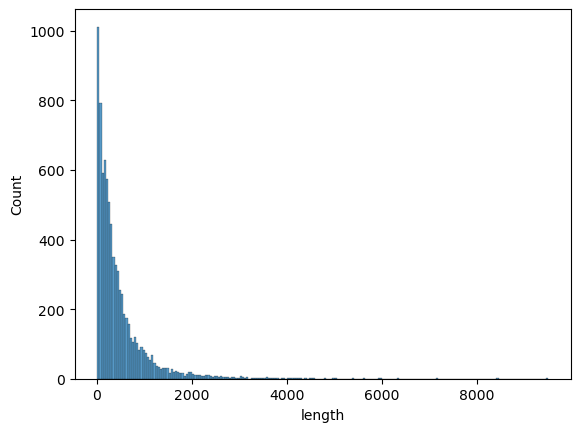

In [30]:
import seaborn as sns
sns.histplot(data=df, x='length')

The tweets have an mean length of 68 characters and a median of 64. They range from 3 to 141 characters with a standard deviation of 35.  The middle 50% are between 39 and 97 characters in length.

This gives us some idea of how long they tend to be.

# Text Normalization with NLTK

## Normalizing Casing

It's common practice to lower the casing of the text in our documents to contribut to normalizing.

In [31]:
df['lower_text'] = df['text'].str.lower()
df.head(10)

/var/folders/rf/vw4r41jd7vd95x1w0dth7v9h0000gp/T/ipykernel_5488/3276476959.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lower_text'] = df['text'].str.lower()


,text,overall,brand,title,length,lower_text
0,Gets the job done for cleaning carpets and the price is wonderful.: Cleans well but the reservoir for clean water is small. The tank needed to be refilled 3 times for one room. Gets the job done for cleaning carpets and the price is wonderful.,3.0,Hoover,Hoover Power Scrub Deluxe Carpet Washer FH50150,243,gets the job done for cleaning carpets and the price is wonderful.: cleans well but the reservoir for clean water is small. the tank needed to be refilled 3 times for one room. gets the job done for cleaning carpets and the price is wonderful.
1,"Great Carpet Cleaner!: The F5914 is very easy to operate. I read the instruction manual and went to work and the machine did just as it was supposed to do. Some reviews I read on the upholtery cleaner said it didn't perform well, but I could no...",5.0,Hoover,Hoover Carpet Cleaner SteamVac with Clean Surge Carpet Cleaner Machine F5914900,407,"great carpet cleaner!: the f5914 is very easy to operate. i read the instruction manual and went to work and the machine did just as it was supposed to do. some reviews i read on the upholtery cleaner said it didn't perform well, but i could no..."
2,"Beats the electric Hoover we had before.: This cleaner is so easy to use! It is light weight, fits under furniture, and easy to clean. The rechargeable battery works like a charm and avoids having to worry about pulling a cord all over the hous...",5.0,Hoover,"Hoover Linx Cordless Stick Vacuum Cleaner, BH50010",433,"beats the electric hoover we had before.: this cleaner is so easy to use! it is light weight, fits under furniture, and easy to clean. the rechargeable battery works like a charm and avoids having to worry about pulling a cord all over the hous..."
3,UP DATE: PILE OF CRAP!!!!: Up date during the second time using the machine it quit working!!!!! Like will NOT turn on!!! And the closest repair center is 2 hours away!!! So what about my soapy wet carpet???? DONE WITH HOOVER,1.0,Hoover,Hoover Power Scrub Deluxe Carpet Washer FH50150,225,up date: pile of crap!!!!: up date during the second time using the machine it quit working!!!!! like will not turn on!!! and the closest repair center is 2 hours away!!! so what about my soapy wet carpet???? done with hoover
4,"STOP LOOKING! BUY THIS ONE!!: OMG! I AM SO MAD!!!! At this rug shampooer??? GOD...NO!!!! At myself for not buying it sooner!! Listen, buy this NOW!! Why?? Where should I start?? Disclaimer: my Black Lab does NOT potty on my rugs BUT an occasi...",5.0,Hoover,Hoover Power Scrub Deluxe Carpet Washer FH50150,2602,"stop looking! buy this one!!: omg! i am so mad!!!! at this rug shampooer??? god...no!!!! at myself for not buying it sooner!! listen, buy this now!! why?? where should i start?? disclaimer: my black lab does not potty on my rugs but an occasi..."
5,Cleans like a professional.: I used a friend's similar model to clean two large braided rugs and was very happy with the results. When is saw it available at a great price I ordered it immediately. I haven't used it yet so I'm only giving it a 4 ...,4.0,Hoover,Hoover Power Scrub Deluxe Carpet Washer FH50150,625,cleans like a professional.: i used a friend's similar model to clean two large braided rugs and was very happy with the results. when is saw it available at a great price i ordered it immediately. i haven't used it yet so i'm only giving it a 4 ...
6,Awesome: This is so powerful for a small vac. I love the cordless feature - I have birds and it picks up seeds just fine. I think my parrots throw seeds just to watch me vacuum. My Macaw throws water on me when I turn it on.,5.0,Hoover,"Hoover Linx Cordless Stick Vacuum Cleaner, BH50010",227,awesome: this is so powerful for a small vac. i love the cordless feature - i have birds and it picks up seeds just fine. i think my parrots throw seeds just to watch me vacuum. my macaw throws water on me when i turn it on.
7,"Seems to be OK: I ordered this Hoover Steamvac after reading all the 

## Tokenizing

Tokenizing text into single word tokens is simple in Python.  We can just use `str.split()`.  The default separator for `.split()` is one space, so `' '`.

We can access Pandas' string accessor with `df.str.<method>`.  This allows us to apply string methods to all rows in a column.

When processing text, if memory allows, it can be useful to keep many versions of your text: tokenize, lemmatized, no stop words, etc.  Some analysis or modeling packages expect tokenized data and others do not.  We often want to use different versions for different kinds of analysis, too.

In [32]:
df['tokens'] = df['lower_text'].str.split()
df.head(10)

/var/folders/rf/vw4r41jd7vd95x1w0dth7v9h0000gp/T/ipykernel_5488/3048687109.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokens'] = df['lower_text'].str.split()


,text,overall,brand,title,length,lower_text,tokens
0,Gets the job done for cleaning carpets and the price is wonderful.: Cleans well but the reservoir for clean water is small. The tank needed to be refilled 3 times for one room. Gets the job done for cleaning carpets and the price is wonderful.,3.0,Hoover,Hoover Power Scrub Deluxe Carpet Washer FH50150,243,gets the job done for cleaning carpets and the price is wonderful.: cleans well but the reservoir for clean water is small. the tank needed to be refilled 3 times for one room. gets the job done for cleaning carpets and the price is wonderful.,"[gets, the, job, done, for, cleaning, carpets, and, the, price, is, wonderful.:, cleans, well, but, the, reservoir, for, clean, water, is, small., the, tank, needed, to, be, refilled, 3, times, for, one, room., gets, the, job, done, for, cleaning..."
1,"Great Carpet Cleaner!: The F5914 is very easy to operate. I read the instruction manual and went to work and the machine did just as it was supposed to do. Some reviews I read on the upholtery cleaner said it didn't perform well, but I could no...",5.0,Hoover,Hoover Carpet Cleaner SteamVac with Clean Surge Carpet Cleaner Machine F5914900,407,"great carpet cleaner!: the f5914 is very easy to operate. i read the instruction manual and went to work and the machine did just as it was supposed to do. some reviews i read on the upholtery cleaner said it didn't perform well, but i could no...","[great, carpet, cleaner!:, the, f5914, is, very, easy, to, operate., i, read, the, instruction, manual, and, went, to, work, and, the, machine, did, just, as, it, was, supposed, to, do., some, reviews, i, read, on, the, upholtery, cleaner, said, ..."
2,"Beats the electric Hoover we had before.: This cleaner is so easy to use! It is light weight, fits under furniture, and easy to clean. The rechargeable battery works like a charm and avoids having to worry about pulling a cord all over the hous...",5.0,Hoover,"Hoover Linx Cordless Stick Vacuum Cleaner, BH50010",433,"beats the electric hoover we had before.: this cleaner is so easy to use! it is light weight, fits under furniture, and easy to clean. the rechargeable battery works like a charm and avoids having to worry about pulling a cord all over the hous...","[beats, the, electric, hoover, we, had, before.:, this, cleaner, is, so, easy, to, use!, it, is, light, weight,, fits, under, furniture,, and, easy, to, clean., the, rechargeable, battery, works, like, a, charm, and, avoids, having, to, worry, ab..."
3,UP DATE: PILE OF CRAP!!!!: Up date during the second time using the machine it quit working!!!!! Like will NOT turn on!!! And the closest repair center is 2 hours away!!! So what about my soapy wet carpet???? DONE WITH HOOVER,1.0,Hoover,Hoover Power Scrub Deluxe Carpet Washer FH50150,225,up date: pile of crap!!!!: up date during the second time using the machine it quit working!!!!! like will not turn on!!! and the closest repair center is 2 hours away!!! so what about my soapy wet carpet???? done with hoover,"[up, date:, pile, of, crap!!!!:, up, date, during, the, second, time, using, the, machine, it, quit, working!!!!!, like, will, not, turn, on!!!, and, the, closest, repair, center, is, 2, hours, away!!!, so, what, about, my, soapy, wet, carpet????..."
4,"STOP LOOKING! BUY THIS ONE!!: OMG! I AM SO MAD!!!! At this rug shampooer??? GOD...NO!!!! At myself for not buying it sooner!! Listen, buy this NOW!! Why?? Where should I start?? Disclaimer: my Black Lab does NOT potty on my rugs BUT an occasi...",5.0,Hoover,Hoover Power Scrub Deluxe Carpet Washer FH50150,2602,"stop looking! buy this one!!: omg! i am so mad!!!! at this rug shampooer??? god...no!!!! at myself for not buying it sooner!! listen, buy this now!! why?? where should i start?? disclaimer: my black lab does not potty on my rugs but an occasi...","[stop, looking!, buy, this, one!!:, omg!, i, am, so, mad!!!!, at, this, rug, shampooer???, god...no!!!!, at, myself, for, not, buying, it, so

### Better way to tokenize data

NLTK has a more sophisticated tokenization function that will isolate things like punctuation as well.  This way 'hooray' and 'hooray!!!' will be the same token.

In order for NLTK to recognize the punctuation, we will need to download the 'punkt' data.

In [33]:
## Download punkt
nltk.download('punkt')

df['tokens'] = df['lower_text'].apply(nltk.word_tokenize)
df.head(10)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/codingdojo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/var/folders/rf/vw4r41jd7vd95x1w0dth7v9h0000gp/T/ipykernel_5488/1696886671.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokens'] = df['lower_text'].apply(nltk.word_tokenize)


,text,overall,brand,title,length,lower_text,tokens
0,Gets the job done for cleaning carpets and the price is wonderful.: Cleans well but the reservoir for clean water is small. The tank needed to be refilled 3 times for one room. Gets the job done for cleaning carpets and the price is wonderful.,3.0,Hoover,Hoover Power Scrub Deluxe Carpet Washer FH50150,243,gets the job done for cleaning carpets and the price is wonderful.: cleans well but the reservoir for clean water is small. the tank needed to be refilled 3 times for one room. gets the job done for cleaning carpets and the price is wonderful.,"[gets, the, job, done, for, cleaning, carpets, and, the, price, is, wonderful, ., :, cleans, well, but, the, reservoir, for, clean, water, is, small, ., the, tank, needed, to, be, refilled, 3, times, for, one, room, ., gets, the, job, done, for, ..."
1,"Great Carpet Cleaner!: The F5914 is very easy to operate. I read the instruction manual and went to work and the machine did just as it was supposed to do. Some reviews I read on the upholtery cleaner said it didn't perform well, but I could no...",5.0,Hoover,Hoover Carpet Cleaner SteamVac with Clean Surge Carpet Cleaner Machine F5914900,407,"great carpet cleaner!: the f5914 is very easy to operate. i read the instruction manual and went to work and the machine did just as it was supposed to do. some reviews i read on the upholtery cleaner said it didn't perform well, but i could no...","[great, carpet, cleaner, !, :, the, f5914, is, very, easy, to, operate, ., i, read, the, instruction, manual, and, went, to, work, and, the, machine, did, just, as, it, was, supposed, to, do, ., some, reviews, i, read, on, the, upholtery, cleaner..."
2,"Beats the electric Hoover we had before.: This cleaner is so easy to use! It is light weight, fits under furniture, and easy to clean. The rechargeable battery works like a charm and avoids having to worry about pulling a cord all over the hous...",5.0,Hoover,"Hoover Linx Cordless Stick Vacuum Cleaner, BH50010",433,"beats the electric hoover we had before.: this cleaner is so easy to use! it is light weight, fits under furniture, and easy to clean. the rechargeable battery works like a charm and avoids having to worry about pulling a cord all over the hous...","[beats, the, electric, hoover, we, had, before, ., :, this, cleaner, is, so, easy, to, use, !, it, is, light, weight, ,, fits, under, furniture, ,, and, easy, to, clean, ., the, rechargeable, battery, works, like, a, charm, and, avoids, having, t..."
3,UP DATE: PILE OF CRAP!!!!: Up date during the second time using the machine it quit working!!!!! Like will NOT turn on!!! And the closest repair center is 2 hours away!!! So what about my soapy wet carpet???? DONE WITH HOOVER,1.0,Hoover,Hoover Power Scrub Deluxe Carpet Washer FH50150,225,up date: pile of crap!!!!: up date during the second time using the machine it quit working!!!!! like will not turn on!!! and the closest repair center is 2 hours away!!! so what about my soapy wet carpet???? done with hoover,"[up, date, :, pile, of, crap, !, !, !, !, :, up, date, during, the, second, time, using, the, machine, it, quit, working, !, !, !, !, !, like, will, not, turn, on, !, !, !, and, the, closest, repair, center, is, 2, hours, away, !, !, !, so, what,..."
4,"STOP LOOKING! BUY THIS ONE!!: OMG! I AM SO MAD!!!! At this rug shampooer??? GOD...NO!!!! At myself for not buying it sooner!! Listen, buy this NOW!! Why?? Where should I start?? Disclaimer: my Black Lab does NOT potty on my rugs BUT an occasi...",5.0,Hoover,Hoover Power Scrub Deluxe Carpet Washer FH50150,2602,"stop looking! buy this one!!: omg! i am so mad!!!! at this rug shampooer??? god...no!!!! at myself for not buying it sooner!! listen, buy this now!! why?? where should i start?? disclaimer: my black lab does not potty on my rugs but an occasi...","[stop, looking, !, buy, this, one, !, !, :, omg, !, i, am, so, mad, !, !, !, !, at, this, rug, shampooer, ?, ?, ?, god, ..., no, !, !, !, !, 

## Remove Stop Words

In [34]:
## Download NLTK stopword list
nltk.download('stopwords')

## Load the English stop words.
stop_words = nltk.corpus.stopwords.words('english')
stop_words[:10]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/codingdojo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

<font color=red> NOTICE </font> that all of the stop words are lower case.  It's necessary to ensure that your tokens are all lower case before using this list to remove stop words.

To remove the stop words from each document, we will apply a function that will check each word in the list of tokens against the list of stopwords and remove them if they are in the list.  More specifically, it will only save them if they are NOT in the list.

In [35]:
# %%timeit
## Remove Stopwords Function v1
def remove_stopwords(tokens):
    no_stops = [token for token in tokens if not token in stop_words]
    return no_stops

df['no_stops'] = df['tokens'].map(remove_stopwords)
df.head(10)

/var/folders/rf/vw4r41jd7vd95x1w0dth7v9h0000gp/T/ipykernel_5488/1879852735.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['no_stops'] = df['tokens'].map(remove_stopwords)


,text,overall,brand,title,length,lower_text,tokens,no_stops
0,Gets the job done for cleaning carpets and the price is wonderful.: Cleans well but the reservoir for clean water is small. The tank needed to be refilled 3 times for one room. Gets the job done for cleaning carpets and the price is wonderful.,3.0,Hoover,Hoover Power Scrub Deluxe Carpet Washer FH50150,243,gets the job done for cleaning carpets and the price is wonderful.: cleans well but the reservoir for clean water is small. the tank needed to be refilled 3 times for one room. gets the job done for cleaning carpets and the price is wonderful.,"[gets, the, job, done, for, cleaning, carpets, and, the, price, is, wonderful, ., :, cleans, well, but, the, reservoir, for, clean, water, is, small, ., the, tank, needed, to, be, refilled, 3, times, for, one, room, ., gets, the, job, done, for, ...","[gets, job, done, cleaning, carpets, price, wonderful, ., :, cleans, well, reservoir, clean, water, small, ., tank, needed, refilled, 3, times, one, room, ., gets, job, done, cleaning, carpets, price, wonderful, .]"
1,"Great Carpet Cleaner!: The F5914 is very easy to operate. I read the instruction manual and went to work and the machine did just as it was supposed to do. Some reviews I read on the upholtery cleaner said it didn't perform well, but I could no...",5.0,Hoover,Hoover Carpet Cleaner SteamVac with Clean Surge Carpet Cleaner Machine F5914900,407,"great carpet cleaner!: the f5914 is very easy to operate. i read the instruction manual and went to work and the machine did just as it was supposed to do. some reviews i read on the upholtery cleaner said it didn't perform well, but i could no...","[great, carpet, cleaner, !, :, the, f5914, is, very, easy, to, operate, ., i, read, the, instruction, manual, and, went, to, work, and, the, machine, did, just, as, it, was, supposed, to, do, ., some, reviews, i, read, on, the, upholtery, cleaner...","[great, carpet, cleaner, !, :, f5914, easy, operate, ., read, instruction, manual, went, work, machine, supposed, ., reviews, read, upholtery, cleaner, said, n't, perform, well, ,, could, find, problems, ., problems, leaking, anything, ., think, ..."
2,"Beats the electric Hoover we had before.: This cleaner is so easy to use! It is light weight, fits under furniture, and easy to clean. The rechargeable battery works like a charm and avoids having to worry about pulling a cord all over the hous...",5.0,Hoover,"Hoover Linx Cordless Stick Vacuum Cleaner, BH50010",433,"beats the electric hoover we had before.: this cleaner is so easy to use! it is light weight, fits under furniture, and easy to clean. the rechargeable battery works like a charm and avoids having to worry about pulling a cord all over the hous...","[beats, the, electric, hoover, we, had, before, ., :, this, cleaner, is, so, easy, to, use, !, it, is, light, weight, ,, fits, under, furniture, ,, and, easy, to, clean, ., the, rechargeable, battery, works, like, a, charm, and, avoids, having, t...","[beats, electric, hoover, ., :, cleaner, easy, use, !, light, weight, ,, fits, furniture, ,, easy, clean, ., rechargeable, battery, works, like, charm, avoids, worry, pulling, cord, house, changing, outlets, ., charge, enough, clean, floors, 1700..."
3,UP DATE: PILE OF CRAP!!!!: Up date during the second time using the machine it quit working!!!!! Like will NOT turn on!!! And the closest repair center is 2 hours away!!! So what about my soapy wet carpet???? DONE WITH HOOVER,1.0,Hoover,Hoover Power Scrub Deluxe Carpet Washer FH50150,225,up date: pile of crap!!!!: up date during the second time using the machine it quit working!!!!! like will not turn on!!! and the closest repair center is 2 hours away!!! so what about my soapy wet carpet???? done with hoover,"[up, date, :, pile, of, crap, !, !, !, !, :, up, date, during, the, second, time, using, the, machine, it, quit, working, !, !, !, !, !, like, will, not, turn, on, !, !, !, and, the, closest, repair, center, is, 2, hours, awa

In [36]:
# %%timeit
## Remove Stopwords Function v2
def remove_stopwords(tokens):
    no_stops = []
    for token in tokens:
        if token not in stop_words:
            no_stops.append(token)            
    return no_stops

df['no_stops'] = df['tokens'].map(remove_stopwords)
df.head(10)

/var/folders/rf/vw4r41jd7vd95x1w0dth7v9h0000gp/T/ipykernel_5488/3191454901.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['no_stops'] = df['tokens'].map(remove_stopwords)


,text,overall,brand,title,length,lower_text,tokens,no_stops
0,Gets the job done for cleaning carpets and the price is wonderful.: Cleans well but the reservoir for clean water is small. The tank needed to be refilled 3 times for one room. Gets the job done for cleaning carpets and the price is wonderful.,3.0,Hoover,Hoover Power Scrub Deluxe Carpet Washer FH50150,243,gets the job done for cleaning carpets and the price is wonderful.: cleans well but the reservoir for clean water is small. the tank needed to be refilled 3 times for one room. gets the job done for cleaning carpets and the price is wonderful.,"[gets, the, job, done, for, cleaning, carpets, and, the, price, is, wonderful, ., :, cleans, well, but, the, reservoir, for, clean, water, is, small, ., the, tank, needed, to, be, refilled, 3, times, for, one, room, ., gets, the, job, done, for, ...","[gets, job, done, cleaning, carpets, price, wonderful, ., :, cleans, well, reservoir, clean, water, small, ., tank, needed, refilled, 3, times, one, room, ., gets, job, done, cleaning, carpets, price, wonderful, .]"
1,"Great Carpet Cleaner!: The F5914 is very easy to operate. I read the instruction manual and went to work and the machine did just as it was supposed to do. Some reviews I read on the upholtery cleaner said it didn't perform well, but I could no...",5.0,Hoover,Hoover Carpet Cleaner SteamVac with Clean Surge Carpet Cleaner Machine F5914900,407,"great carpet cleaner!: the f5914 is very easy to operate. i read the instruction manual and went to work and the machine did just as it was supposed to do. some reviews i read on the upholtery cleaner said it didn't perform well, but i could no...","[great, carpet, cleaner, !, :, the, f5914, is, very, easy, to, operate, ., i, read, the, instruction, manual, and, went, to, work, and, the, machine, did, just, as, it, was, supposed, to, do, ., some, reviews, i, read, on, the, upholtery, cleaner...","[great, carpet, cleaner, !, :, f5914, easy, operate, ., read, instruction, manual, went, work, machine, supposed, ., reviews, read, upholtery, cleaner, said, n't, perform, well, ,, could, find, problems, ., problems, leaking, anything, ., think, ..."
2,"Beats the electric Hoover we had before.: This cleaner is so easy to use! It is light weight, fits under furniture, and easy to clean. The rechargeable battery works like a charm and avoids having to worry about pulling a cord all over the hous...",5.0,Hoover,"Hoover Linx Cordless Stick Vacuum Cleaner, BH50010",433,"beats the electric hoover we had before.: this cleaner is so easy to use! it is light weight, fits under furniture, and easy to clean. the rechargeable battery works like a charm and avoids having to worry about pulling a cord all over the hous...","[beats, the, electric, hoover, we, had, before, ., :, this, cleaner, is, so, easy, to, use, !, it, is, light, weight, ,, fits, under, furniture, ,, and, easy, to, clean, ., the, rechargeable, battery, works, like, a, charm, and, avoids, having, t...","[beats, electric, hoover, ., :, cleaner, easy, use, !, light, weight, ,, fits, furniture, ,, easy, clean, ., rechargeable, battery, works, like, charm, avoids, worry, pulling, cord, house, changing, outlets, ., charge, enough, clean, floors, 1700..."
3,UP DATE: PILE OF CRAP!!!!: Up date during the second time using the machine it quit working!!!!! Like will NOT turn on!!! And the closest repair center is 2 hours away!!! So what about my soapy wet carpet???? DONE WITH HOOVER,1.0,Hoover,Hoover Power Scrub Deluxe Carpet Washer FH50150,225,up date: pile of crap!!!!: up date during the second time using the machine it quit working!!!!! like will not turn on!!! and the closest repair center is 2 hours away!!! so what about my soapy wet carpet???? done with hoover,"[up, date, :, pile, of, crap, !, !, !, !, :, up, date, during, the, second, time, using, the, machine, it, quit, working, !, !, !, !, !, like, will, not, turn, on, !, !, !, and, the, closest, repair, center, is, 2, hours, awa

In [37]:
# %%timeit
## Remove Stopwords Function v3 (mimics final LP function)
def remove_stopwords(tokens):
    no_stops = []
    
    for token in tokens:
        if token in stop_words:
            continue
            
        else:
            no_stops.append(token)
            
    return no_stops

df['no_stops'] = df['tokens'].map(remove_stopwords)
df.head(10)

/var/folders/rf/vw4r41jd7vd95x1w0dth7v9h0000gp/T/ipykernel_5488/4239715559.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['no_stops'] = df['tokens'].map(remove_stopwords)


,text,overall,brand,title,length,lower_text,tokens,no_stops
0,Gets the job done for cleaning carpets and the price is wonderful.: Cleans well but the reservoir for clean water is small. The tank needed to be refilled 3 times for one room. Gets the job done for cleaning carpets and the price is wonderful.,3.0,Hoover,Hoover Power Scrub Deluxe Carpet Washer FH50150,243,gets the job done for cleaning carpets and the price is wonderful.: cleans well but the reservoir for clean water is small. the tank needed to be refilled 3 times for one room. gets the job done for cleaning carpets and the price is wonderful.,"[gets, the, job, done, for, cleaning, carpets, and, the, price, is, wonderful, ., :, cleans, well, but, the, reservoir, for, clean, water, is, small, ., the, tank, needed, to, be, refilled, 3, times, for, one, room, ., gets, the, job, done, for, ...","[gets, job, done, cleaning, carpets, price, wonderful, ., :, cleans, well, reservoir, clean, water, small, ., tank, needed, refilled, 3, times, one, room, ., gets, job, done, cleaning, carpets, price, wonderful, .]"
1,"Great Carpet Cleaner!: The F5914 is very easy to operate. I read the instruction manual and went to work and the machine did just as it was supposed to do. Some reviews I read on the upholtery cleaner said it didn't perform well, but I could no...",5.0,Hoover,Hoover Carpet Cleaner SteamVac with Clean Surge Carpet Cleaner Machine F5914900,407,"great carpet cleaner!: the f5914 is very easy to operate. i read the instruction manual and went to work and the machine did just as it was supposed to do. some reviews i read on the upholtery cleaner said it didn't perform well, but i could no...","[great, carpet, cleaner, !, :, the, f5914, is, very, easy, to, operate, ., i, read, the, instruction, manual, and, went, to, work, and, the, machine, did, just, as, it, was, supposed, to, do, ., some, reviews, i, read, on, the, upholtery, cleaner...","[great, carpet, cleaner, !, :, f5914, easy, operate, ., read, instruction, manual, went, work, machine, supposed, ., reviews, read, upholtery, cleaner, said, n't, perform, well, ,, could, find, problems, ., problems, leaking, anything, ., think, ..."
2,"Beats the electric Hoover we had before.: This cleaner is so easy to use! It is light weight, fits under furniture, and easy to clean. The rechargeable battery works like a charm and avoids having to worry about pulling a cord all over the hous...",5.0,Hoover,"Hoover Linx Cordless Stick Vacuum Cleaner, BH50010",433,"beats the electric hoover we had before.: this cleaner is so easy to use! it is light weight, fits under furniture, and easy to clean. the rechargeable battery works like a charm and avoids having to worry about pulling a cord all over the hous...","[beats, the, electric, hoover, we, had, before, ., :, this, cleaner, is, so, easy, to, use, !, it, is, light, weight, ,, fits, under, furniture, ,, and, easy, to, clean, ., the, rechargeable, battery, works, like, a, charm, and, avoids, having, t...","[beats, electric, hoover, ., :, cleaner, easy, use, !, light, weight, ,, fits, furniture, ,, easy, clean, ., rechargeable, battery, works, like, charm, avoids, worry, pulling, cord, house, changing, outlets, ., charge, enough, clean, floors, 1700..."
3,UP DATE: PILE OF CRAP!!!!: Up date during the second time using the machine it quit working!!!!! Like will NOT turn on!!! And the closest repair center is 2 hours away!!! So what about my soapy wet carpet???? DONE WITH HOOVER,1.0,Hoover,Hoover Power Scrub Deluxe Carpet Washer FH50150,225,up date: pile of crap!!!!: up date during the second time using the machine it quit working!!!!! like will not turn on!!! and the closest repair center is 2 hours away!!! so what about my soapy wet carpet???? done with hoover,"[up, date, :, pile, of, crap, !, !, !, !, :, up, date, during, the, second, time, using, the, machine, it, quit, working, !, !, !, !, !, like, will, not, turn, on, !, !, !, and, the, closest, repair, center, is, 2, hours, awa

## Remove Punctuation

We can remove punctuation in a similar that we removed stop words.  However, we will get our list of punctuation from the built in Python string library.

In [38]:
## Import built-in String Libary
from string import punctuation
print(punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [39]:
# %%timeit
# Remove punctuation - v1
def remove_punct(tokens):
    no_punct = [token for token in tokens if not token in punctuation]
    return no_punct

df['no_stops_no_punct'] = df['no_stops'].apply(remove_punct)
df.head(10)

/var/folders/rf/vw4r41jd7vd95x1w0dth7v9h0000gp/T/ipykernel_5488/521651781.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['no_stops_no_punct'] = df['no_stops'].apply(remove_punct)


,text,overall,brand,title,length,lower_text,tokens,no_stops,no_stops_no_punct
0,Gets the job done for cleaning carpets and the price is wonderful.: Cleans well but the reservoir for clean water is small. The tank needed to be refilled 3 times for one room. Gets the job done for cleaning carpets and the price is wonderful.,3.0,Hoover,Hoover Power Scrub Deluxe Carpet Washer FH50150,243,gets the job done for cleaning carpets and the price is wonderful.: cleans well but the reservoir for clean water is small. the tank needed to be refilled 3 times for one room. gets the job done for cleaning carpets and the price is wonderful.,"[gets, the, job, done, for, cleaning, carpets, and, the, price, is, wonderful, ., :, cleans, well, but, the, reservoir, for, clean, water, is, small, ., the, tank, needed, to, be, refilled, 3, times, for, one, room, ., gets, the, job, done, for, ...","[gets, job, done, cleaning, carpets, price, wonderful, ., :, cleans, well, reservoir, clean, water, small, ., tank, needed, refilled, 3, times, one, room, ., gets, job, done, cleaning, carpets, price, wonderful, .]","[gets, job, done, cleaning, carpets, price, wonderful, cleans, well, reservoir, clean, water, small, tank, needed, refilled, 3, times, one, room, gets, job, done, cleaning, carpets, price, wonderful]"
1,"Great Carpet Cleaner!: The F5914 is very easy to operate. I read the instruction manual and went to work and the machine did just as it was supposed to do. Some reviews I read on the upholtery cleaner said it didn't perform well, but I could no...",5.0,Hoover,Hoover Carpet Cleaner SteamVac with Clean Surge Carpet Cleaner Machine F5914900,407,"great carpet cleaner!: the f5914 is very easy to operate. i read the instruction manual and went to work and the machine did just as it was supposed to do. some reviews i read on the upholtery cleaner said it didn't perform well, but i could no...","[great, carpet, cleaner, !, :, the, f5914, is, very, easy, to, operate, ., i, read, the, instruction, manual, and, went, to, work, and, the, machine, did, just, as, it, was, supposed, to, do, ., some, reviews, i, read, on, the, upholtery, cleaner...","[great, carpet, cleaner, !, :, f5914, easy, operate, ., read, instruction, manual, went, work, machine, supposed, ., reviews, read, upholtery, cleaner, said, n't, perform, well, ,, could, find, problems, ., problems, leaking, anything, ., think, ...","[great, carpet, cleaner, f5914, easy, operate, read, instruction, manual, went, work, machine, supposed, reviews, read, upholtery, cleaner, said, n't, perform, well, could, find, problems, problems, leaking, anything, think, read, instructions, p..."
2,"Beats the electric Hoover we had before.: This cleaner is so easy to use! It is light weight, fits under furniture, and easy to clean. The rechargeable battery works like a charm and avoids having to worry about pulling a cord all over the hous...",5.0,Hoover,"Hoover Linx Cordless Stick Vacuum Cleaner, BH50010",433,"beats the electric hoover we had before.: this cleaner is so easy to use! it is light weight, fits under furniture, and easy to clean. the rechargeable battery works like a charm and avoids having to worry about pulling a cord all over the hous...","[beats, the, electric, hoover, we, had, before, ., :, this, cleaner, is, so, easy, to, use, !, it, is, light, weight, ,, fits, under, furniture, ,, and, easy, to, clean, ., the, rechargeable, battery, works, like, a, charm, and, avoids, having, t...","[beats, electric, hoover, ., :, cleaner, easy, use, !, light, weight, ,, fits, furniture, ,, easy, clean, ., rechargeable, battery, works, like, charm, avoids, worry, pulling, cord, house, changing, outlets, ., charge, enough, clean, floors, 1700...","[beats, electric, hoover, cleaner, easy, use, light, weight, fits, furniture, easy, clean, rechargeable, battery, works, like, charm, avoids, worry, pulling, cord, house, changing, outlets, charge, enough, clean, floors, 1700, sq, ft, house, stan..."
3,UP DATE: PILE OF 

In [40]:
# %%timeit
# Remove punctuation - v2
def remove_punct(tokens):
    no_punct = []
    for token in tokens:
        if token not in punctuation:
            no_punct.append(token)
    return no_punct

df['no_stops_no_punct'] = df['no_stops'].apply(remove_punct)
df.head(10)

/var/folders/rf/vw4r41jd7vd95x1w0dth7v9h0000gp/T/ipykernel_5488/559574584.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['no_stops_no_punct'] = df['no_stops'].apply(remove_punct)


,text,overall,brand,title,length,lower_text,tokens,no_stops,no_stops_no_punct
0,Gets the job done for cleaning carpets and the price is wonderful.: Cleans well but the reservoir for clean water is small. The tank needed to be refilled 3 times for one room. Gets the job done for cleaning carpets and the price is wonderful.,3.0,Hoover,Hoover Power Scrub Deluxe Carpet Washer FH50150,243,gets the job done for cleaning carpets and the price is wonderful.: cleans well but the reservoir for clean water is small. the tank needed to be refilled 3 times for one room. gets the job done for cleaning carpets and the price is wonderful.,"[gets, the, job, done, for, cleaning, carpets, and, the, price, is, wonderful, ., :, cleans, well, but, the, reservoir, for, clean, water, is, small, ., the, tank, needed, to, be, refilled, 3, times, for, one, room, ., gets, the, job, done, for, ...","[gets, job, done, cleaning, carpets, price, wonderful, ., :, cleans, well, reservoir, clean, water, small, ., tank, needed, refilled, 3, times, one, room, ., gets, job, done, cleaning, carpets, price, wonderful, .]","[gets, job, done, cleaning, carpets, price, wonderful, cleans, well, reservoir, clean, water, small, tank, needed, refilled, 3, times, one, room, gets, job, done, cleaning, carpets, price, wonderful]"
1,"Great Carpet Cleaner!: The F5914 is very easy to operate. I read the instruction manual and went to work and the machine did just as it was supposed to do. Some reviews I read on the upholtery cleaner said it didn't perform well, but I could no...",5.0,Hoover,Hoover Carpet Cleaner SteamVac with Clean Surge Carpet Cleaner Machine F5914900,407,"great carpet cleaner!: the f5914 is very easy to operate. i read the instruction manual and went to work and the machine did just as it was supposed to do. some reviews i read on the upholtery cleaner said it didn't perform well, but i could no...","[great, carpet, cleaner, !, :, the, f5914, is, very, easy, to, operate, ., i, read, the, instruction, manual, and, went, to, work, and, the, machine, did, just, as, it, was, supposed, to, do, ., some, reviews, i, read, on, the, upholtery, cleaner...","[great, carpet, cleaner, !, :, f5914, easy, operate, ., read, instruction, manual, went, work, machine, supposed, ., reviews, read, upholtery, cleaner, said, n't, perform, well, ,, could, find, problems, ., problems, leaking, anything, ., think, ...","[great, carpet, cleaner, f5914, easy, operate, read, instruction, manual, went, work, machine, supposed, reviews, read, upholtery, cleaner, said, n't, perform, well, could, find, problems, problems, leaking, anything, think, read, instructions, p..."
2,"Beats the electric Hoover we had before.: This cleaner is so easy to use! It is light weight, fits under furniture, and easy to clean. The rechargeable battery works like a charm and avoids having to worry about pulling a cord all over the hous...",5.0,Hoover,"Hoover Linx Cordless Stick Vacuum Cleaner, BH50010",433,"beats the electric hoover we had before.: this cleaner is so easy to use! it is light weight, fits under furniture, and easy to clean. the rechargeable battery works like a charm and avoids having to worry about pulling a cord all over the hous...","[beats, the, electric, hoover, we, had, before, ., :, this, cleaner, is, so, easy, to, use, !, it, is, light, weight, ,, fits, under, furniture, ,, and, easy, to, clean, ., the, rechargeable, battery, works, like, a, charm, and, avoids, having, t...","[beats, electric, hoover, ., :, cleaner, easy, use, !, light, weight, ,, fits, furniture, ,, easy, clean, ., rechargeable, battery, works, like, charm, avoids, worry, pulling, cord, house, changing, outlets, ., charge, enough, clean, floors, 1700...","[beats, electric, hoover, cleaner, easy, use, light, weight, fits, furniture, easy, clean, rechargeable, battery, works, like, charm, avoids, worry, pulling, cord, house, changing, outlets, charge, enough, clean, floors, 1700, sq, ft, house, stan..."
3,UP DATE: PILE OF 

In [41]:
# %%timeit
# Remove punctuation - v3
def remove_punct(tokens):
    no_punct = []
    for token in tokens:
        if token in punctuation:
            continue
        else:
            no_punct.append(token)
    return no_punct

df['no_stops_no_punct'] = df['no_stops'].apply(remove_punct)
df.head(10)

/var/folders/rf/vw4r41jd7vd95x1w0dth7v9h0000gp/T/ipykernel_5488/3276627384.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['no_stops_no_punct'] = df['no_stops'].apply(remove_punct)


,text,overall,brand,title,length,lower_text,tokens,no_stops,no_stops_no_punct
0,Gets the job done for cleaning carpets and the price is wonderful.: Cleans well but the reservoir for clean water is small. The tank needed to be refilled 3 times for one room. Gets the job done for cleaning carpets and the price is wonderful.,3.0,Hoover,Hoover Power Scrub Deluxe Carpet Washer FH50150,243,gets the job done for cleaning carpets and the price is wonderful.: cleans well but the reservoir for clean water is small. the tank needed to be refilled 3 times for one room. gets the job done for cleaning carpets and the price is wonderful.,"[gets, the, job, done, for, cleaning, carpets, and, the, price, is, wonderful, ., :, cleans, well, but, the, reservoir, for, clean, water, is, small, ., the, tank, needed, to, be, refilled, 3, times, for, one, room, ., gets, the, job, done, for, ...","[gets, job, done, cleaning, carpets, price, wonderful, ., :, cleans, well, reservoir, clean, water, small, ., tank, needed, refilled, 3, times, one, room, ., gets, job, done, cleaning, carpets, price, wonderful, .]","[gets, job, done, cleaning, carpets, price, wonderful, cleans, well, reservoir, clean, water, small, tank, needed, refilled, 3, times, one, room, gets, job, done, cleaning, carpets, price, wonderful]"
1,"Great Carpet Cleaner!: The F5914 is very easy to operate. I read the instruction manual and went to work and the machine did just as it was supposed to do. Some reviews I read on the upholtery cleaner said it didn't perform well, but I could no...",5.0,Hoover,Hoover Carpet Cleaner SteamVac with Clean Surge Carpet Cleaner Machine F5914900,407,"great carpet cleaner!: the f5914 is very easy to operate. i read the instruction manual and went to work and the machine did just as it was supposed to do. some reviews i read on the upholtery cleaner said it didn't perform well, but i could no...","[great, carpet, cleaner, !, :, the, f5914, is, very, easy, to, operate, ., i, read, the, instruction, manual, and, went, to, work, and, the, machine, did, just, as, it, was, supposed, to, do, ., some, reviews, i, read, on, the, upholtery, cleaner...","[great, carpet, cleaner, !, :, f5914, easy, operate, ., read, instruction, manual, went, work, machine, supposed, ., reviews, read, upholtery, cleaner, said, n't, perform, well, ,, could, find, problems, ., problems, leaking, anything, ., think, ...","[great, carpet, cleaner, f5914, easy, operate, read, instruction, manual, went, work, machine, supposed, reviews, read, upholtery, cleaner, said, n't, perform, well, could, find, problems, problems, leaking, anything, think, read, instructions, p..."
2,"Beats the electric Hoover we had before.: This cleaner is so easy to use! It is light weight, fits under furniture, and easy to clean. The rechargeable battery works like a charm and avoids having to worry about pulling a cord all over the hous...",5.0,Hoover,"Hoover Linx Cordless Stick Vacuum Cleaner, BH50010",433,"beats the electric hoover we had before.: this cleaner is so easy to use! it is light weight, fits under furniture, and easy to clean. the rechargeable battery works like a charm and avoids having to worry about pulling a cord all over the hous...","[beats, the, electric, hoover, we, had, before, ., :, this, cleaner, is, so, easy, to, use, !, it, is, light, weight, ,, fits, under, furniture, ,, and, easy, to, clean, ., the, rechargeable, battery, works, like, a, charm, and, avoids, having, t...","[beats, electric, hoover, ., :, cleaner, easy, use, !, light, weight, ,, fits, furniture, ,, easy, clean, ., rechargeable, battery, works, like, charm, avoids, worry, pulling, cord, house, changing, outlets, ., charge, enough, clean, floors, 1700...","[beats, electric, hoover, cleaner, easy, use, light, weight, fits, furniture, easy, clean, rechargeable, battery, works, like, charm, avoids, worry, pulling, cord, house, changing, outlets, charge, enough, clean, floors, 1700, sq, ft, house, stan..."
3,UP DATE: PILE OF 

## Remove URLs

We can see that NLTK divided the 'http' and '//www.' portions of the web addresses.  We will need to deal with those separately.

In [42]:
## Define function to remove URLs v1
def remove_urls(token_list):
    no_urls = [token for token in token_list if not 'http' in token and not 'www' in token]
    return no_urls

## Remove URLs from no_stops_no_punct
df['no_stops_no_punct'] = df['no_stops_no_punct'].apply(remove_urls)

/var/folders/rf/vw4r41jd7vd95x1w0dth7v9h0000gp/T/ipykernel_5488/2114789055.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['no_stops_no_punct'] = df['no_stops_no_punct'].apply(remove_urls)


In [43]:
df.head(10)

,text,overall,brand,title,length,lower_text,tokens,no_stops,no_stops_no_punct
0,Gets the job done for cleaning carpets and the price is wonderful.: Cleans well but the reservoir for clean water is small. The tank needed to be refilled 3 times for one room. Gets the job done for cleaning carpets and the price is wonderful.,3.0,Hoover,Hoover Power Scrub Deluxe Carpet Washer FH50150,243,gets the job done for cleaning carpets and the price is wonderful.: cleans well but the reservoir for clean water is small. the tank needed to be refilled 3 times for one room. gets the job done for cleaning carpets and the price is wonderful.,"[gets, the, job, done, for, cleaning, carpets, and, the, price, is, wonderful, ., :, cleans, well, but, the, reservoir, for, clean, water, is, small, ., the, tank, needed, to, be, refilled, 3, times, for, one, room, ., gets, the, job, done, for, ...","[gets, job, done, cleaning, carpets, price, wonderful, ., :, cleans, well, reservoir, clean, water, small, ., tank, needed, refilled, 3, times, one, room, ., gets, job, done, cleaning, carpets, price, wonderful, .]","[gets, job, done, cleaning, carpets, price, wonderful, cleans, well, reservoir, clean, water, small, tank, needed, refilled, 3, times, one, room, gets, job, done, cleaning, carpets, price, wonderful]"
1,"Great Carpet Cleaner!: The F5914 is very easy to operate. I read the instruction manual and went to work and the machine did just as it was supposed to do. Some reviews I read on the upholtery cleaner said it didn't perform well, but I could no...",5.0,Hoover,Hoover Carpet Cleaner SteamVac with Clean Surge Carpet Cleaner Machine F5914900,407,"great carpet cleaner!: the f5914 is very easy to operate. i read the instruction manual and went to work and the machine did just as it was supposed to do. some reviews i read on the upholtery cleaner said it didn't perform well, but i could no...","[great, carpet, cleaner, !, :, the, f5914, is, very, easy, to, operate, ., i, read, the, instruction, manual, and, went, to, work, and, the, machine, did, just, as, it, was, supposed, to, do, ., some, reviews, i, read, on, the, upholtery, cleaner...","[great, carpet, cleaner, !, :, f5914, easy, operate, ., read, instruction, manual, went, work, machine, supposed, ., reviews, read, upholtery, cleaner, said, n't, perform, well, ,, could, find, problems, ., problems, leaking, anything, ., think, ...","[great, carpet, cleaner, f5914, easy, operate, read, instruction, manual, went, work, machine, supposed, reviews, read, upholtery, cleaner, said, n't, perform, well, could, find, problems, problems, leaking, anything, think, read, instructions, p..."
2,"Beats the electric Hoover we had before.: This cleaner is so easy to use! It is light weight, fits under furniture, and easy to clean. The rechargeable battery works like a charm and avoids having to worry about pulling a cord all over the hous...",5.0,Hoover,"Hoover Linx Cordless Stick Vacuum Cleaner, BH50010",433,"beats the electric hoover we had before.: this cleaner is so easy to use! it is light weight, fits under furniture, and easy to clean. the rechargeable battery works like a charm and avoids having to worry about pulling a cord all over the hous...","[beats, the, electric, hoover, we, had, before, ., :, this, cleaner, is, so, easy, to, use, !, it, is, light, weight, ,, fits, under, furniture, ,, and, easy, to, clean, ., the, rechargeable, battery, works, like, a, charm, and, avoids, having, t...","[beats, electric, hoover, ., :, cleaner, easy, use, !, light, weight, ,, fits, furniture, ,, easy, clean, ., rechargeable, battery, works, like, charm, avoids, worry, pulling, cord, house, changing, outlets, ., charge, enough, clean, floors, 1700...","[beats, electric, hoover, cleaner, easy, use, light, weight, fits, furniture, easy, clean, rechargeable, battery, works, like, charm, avoids, worry, pulling, cord, house, changing, outlets, charge, enough, clean, floors, 1700, sq, ft, house, stan..."
3,UP DATE: PILE OF 

In [44]:
## Define function to remove URLs v2
def remove_urls(token_list):
    no_urls = []
    for token in token_list:
        if ('http' not in token) & ('www' not in token):
            no_urls.append(token)
    return no_urls

## Remove URLs from no_stops_no_punct
df['no_stops_no_punct'] = df['no_stops_no_punct'].apply(remove_urls)
df

/var/folders/rf/vw4r41jd7vd95x1w0dth7v9h0000gp/T/ipykernel_5488/457190377.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['no_stops_no_punct'] = df['no_stops_no_punct'].apply(remove_urls)


,text,overall,brand,title,length,lower_text,tokens,no_stops,no_stops_no_punct
0,Gets the job done for cleaning carpets and the price is wonderful.: Cleans well but the reservoir for clean water is small. The tank needed to be refilled 3 times for one room. Gets the job done for cleaning carpets and the price is wonderful.,3.0,Hoover,Hoover Power Scrub Deluxe Carpet Washer FH50150,243,gets the job done for cleaning carpets and the price is wonderful.: cleans well but the reservoir for clean water is small. the tank needed to be refilled 3 times for one room. gets the job done for cleaning carpets and the price is wonderful.,"[gets, the, job, done, for, cleaning, carpets, and, the, price, is, wonderful, ., :, cleans, well, but, the, reservoir, for, clean, water, is, small, ., the, tank, needed, to, be, refilled, 3, times, for, one, room, ., gets, the, job, done, for, ...","[gets, job, done, cleaning, carpets, price, wonderful, ., :, cleans, well, reservoir, clean, water, small, ., tank, needed, refilled, 3, times, one, room, ., gets, job, done, cleaning, carpets, price, wonderful, .]","[gets, job, done, cleaning, carpets, price, wonderful, cleans, well, reservoir, clean, water, small, tank, needed, refilled, 3, times, one, room, gets, job, done, cleaning, carpets, price, wonderful]"
1,"Great Carpet Cleaner!: The F5914 is very easy to operate. I read the instruction manual and went to work and the machine did just as it was supposed to do. Some reviews I read on the upholtery cleaner said it didn't perform well, but I could no...",5.0,Hoover,Hoover Carpet Cleaner SteamVac with Clean Surge Carpet Cleaner Machine F5914900,407,"great carpet cleaner!: the f5914 is very easy to operate. i read the instruction manual and went to work and the machine did just as it was supposed to do. some reviews i read on the upholtery cleaner said it didn't perform well, but i could no...","[great, carpet, cleaner, !, :, the, f5914, is, very, easy, to, operate, ., i, read, the, instruction, manual, and, went, to, work, and, the, machine, did, just, as, it, was, supposed, to, do, ., some, reviews, i, read, on, the, upholtery, cleaner...","[great, carpet, cleaner, !, :, f5914, easy, operate, ., read, instruction, manual, went, work, machine, supposed, ., reviews, read, upholtery, cleaner, said, n't, perform, well, ,, could, find, problems, ., problems, leaking, anything, ., think, ...","[great, carpet, cleaner, f5914, easy, operate, read, instruction, manual, went, work, machine, supposed, reviews, read, upholtery, cleaner, said, n't, perform, well, could, find, problems, problems, leaking, anything, think, read, instructions, p..."
2,"Beats the electric Hoover we had before.: This cleaner is so easy to use! It is light weight, fits under furniture, and easy to clean. The rechargeable battery works like a charm and avoids having to worry about pulling a cord all over the hous...",5.0,Hoover,"Hoover Linx Cordless Stick Vacuum Cleaner, BH50010",433,"beats the electric hoover we had before.: this cleaner is so easy to use! it is light weight, fits under furniture, and easy to clean. the rechargeable battery works like a charm and avoids having to worry about pulling a cord all over the hous...","[beats, the, electric, hoover, we, had, before, ., :, this, cleaner, is, so, easy, to, use, !, it, is, light, weight, ,, fits, under, furniture, ,, and, easy, to, clean, ., the, rechargeable, battery, works, like, a, charm, and, avoids, having, t...","[beats, electric, hoover, ., :, cleaner, easy, use, !, light, weight, ,, fits, furniture, ,, easy, clean, ., rechargeable, battery, works, like, charm, avoids, worry, pulling, cord, house, changing, outlets, ., charge, enough, clean, floors, 1700...","[beats, electric, hoover, cleaner, easy, use, light, weight, fits, furniture, easy, clean, rechargeable, battery, works, like, charm, avoids, worry, pulling, cord, house, changing, outlets, charge, enough, clean, floors, 1700, sq, ft, house, stan..."
3,UP DATE: PILE OF 

## Results

Note how many fewer tokens we have in our `no_stops_no_punct` tokens than in our original.  However, some information was lost, but a lot was also retained.  

Normalization is a huge part of the NLP process and is always a balance between reducing the size of our vocabulary and therefor simplifying our models, and retaining enough information for the model to extract some meaningful patterns in the texts.  

There are a lot of choices here to make.

# Normalizing Text with spaCy

The spaCy Python package provides text processing pipelines that can do many of these operations, plus much more complicated processing, very fast and in many fewer steps.  For this reason it is a very popular tool.  

It utilizes pretrained language models that can recognize things like parts of speech and named entities (people, specific places, currency, etc.)

spaCy was not included in your original dojo_env, so you will need to install if if you have not already.

We will also download the pretrained english language model trained on millions of web documents.  We will use the small sized one for efficiency.

In [45]:
## Install spacy if necessary 
# (best if run in terminal without the "%" first character)
%conda install -c conda-forge spacy

Channels:
 - conda-forge
 - defaults
 - plotly
Platform: osx-arm64
Solving environment: done


==> WARNING: A newer version of conda exists. <==
    current version: 23.9.0
    latest version: 23.11.0

Please update conda by running

    $ conda update -n base -c conda-forge conda



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [46]:
# !python -m spacy download en_core_web_sm
import spacy
## Download the English small-sized model trained on web documents if necessary
spacy.cli.download('en_core_web_sm')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 56.6 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [47]:


import spacy

## Download the English small-sized model trained on web documents if necessary
# spacy.cli.download('en_core_web_sm')

## The spaCy model

In [48]:
## Load the model.  Disable Named Entity Recognizer (too slow)
nlp_model = spacy.load('en_core_web_sm', disable='ner')
nlp_model.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer']

We have our model, and we can apply it like a function.  It expects a string of text as the input.

In [49]:
df.head()

,text,overall,brand,title,length,lower_text,tokens,no_stops,no_stops_no_punct
0,Gets the job done for cleaning carpets and the price is wonderful.: Cleans well but the reservoir for clean water is small. The tank needed to be refilled 3 times for one room. Gets the job done for cleaning carpets and the price is wonderful.,3.0,Hoover,Hoover Power Scrub Deluxe Carpet Washer FH50150,243,gets the job done for cleaning carpets and the price is wonderful.: cleans well but the reservoir for clean water is small. the tank needed to be refilled 3 times for one room. gets the job done for cleaning carpets and the price is wonderful.,"[gets, the, job, done, for, cleaning, carpets, and, the, price, is, wonderful, ., :, cleans, well, but, the, reservoir, for, clean, water, is, small, ., the, tank, needed, to, be, refilled, 3, times, for, one, room, ., gets, the, job, done, for, ...","[gets, job, done, cleaning, carpets, price, wonderful, ., :, cleans, well, reservoir, clean, water, small, ., tank, needed, refilled, 3, times, one, room, ., gets, job, done, cleaning, carpets, price, wonderful, .]","[gets, job, done, cleaning, carpets, price, wonderful, cleans, well, reservoir, clean, water, small, tank, needed, refilled, 3, times, one, room, gets, job, done, cleaning, carpets, price, wonderful]"
1,"Great Carpet Cleaner!: The F5914 is very easy to operate. I read the instruction manual and went to work and the machine did just as it was supposed to do. Some reviews I read on the upholtery cleaner said it didn't perform well, but I could no...",5.0,Hoover,Hoover Carpet Cleaner SteamVac with Clean Surge Carpet Cleaner Machine F5914900,407,"great carpet cleaner!: the f5914 is very easy to operate. i read the instruction manual and went to work and the machine did just as it was supposed to do. some reviews i read on the upholtery cleaner said it didn't perform well, but i could no...","[great, carpet, cleaner, !, :, the, f5914, is, very, easy, to, operate, ., i, read, the, instruction, manual, and, went, to, work, and, the, machine, did, just, as, it, was, supposed, to, do, ., some, reviews, i, read, on, the, upholtery, cleaner...","[great, carpet, cleaner, !, :, f5914, easy, operate, ., read, instruction, manual, went, work, machine, supposed, ., reviews, read, upholtery, cleaner, said, n't, perform, well, ,, could, find, problems, ., problems, leaking, anything, ., think, ...","[great, carpet, cleaner, f5914, easy, operate, read, instruction, manual, went, work, machine, supposed, reviews, read, upholtery, cleaner, said, n't, perform, well, could, find, problems, problems, leaking, anything, think, read, instructions, p..."
2,"Beats the electric Hoover we had before.: This cleaner is so easy to use! It is light weight, fits under furniture, and easy to clean. The rechargeable battery works like a charm and avoids having to worry about pulling a cord all over the hous...",5.0,Hoover,"Hoover Linx Cordless Stick Vacuum Cleaner, BH50010",433,"beats the electric hoover we had before.: this cleaner is so easy to use! it is light weight, fits under furniture, and easy to clean. the rechargeable battery works like a charm and avoids having to worry about pulling a cord all over the hous...","[beats, the, electric, hoover, we, had, before, ., :, this, cleaner, is, so, easy, to, use, !, it, is, light, weight, ,, fits, under, furniture, ,, and, easy, to, clean, ., the, rechargeable, battery, works, like, a, charm, and, avoids, having, t...","[beats, electric, hoover, ., :, cleaner, easy, use, !, light, weight, ,, fits, furniture, ,, easy, clean, ., rechargeable, battery, works, like, charm, avoids, worry, pulling, cord, house, changing, outlets, ., charge, enough, clean, floors, 1700...","[beats, electric, hoover, cleaner, easy, use, light, weight, fits, furniture, easy, clean, rechargeable, battery, works, like, charm, avoids, worry, pulling, cord, house, changing, outlets, charge, enough, clean, floors, 1700, sq, ft, house, stan..."
3,UP DATE: PILE OF 

In [50]:
raw_text = df.loc[2,'text']
raw_text

'Beats the electric Hoover we had before.: This cleaner is so easy to use!  It is light weight, fits under furniture, and easy to clean.  The rechargeable battery works like a charm and avoids having to worry about pulling a cord all over the house and changing outlets.  Charge is more than enough to clean the floors in a 1700 sq ft house.  It stands upright and is not as prone to falling over as the electric hoover we had before.'

In [51]:
## Process a document with the model
doc = nlp_model(raw_text)
doc

Beats the electric Hoover we had before.: This cleaner is so easy to use!  It is light weight, fits under furniture, and easy to clean.  The rechargeable battery works like a charm and avoids having to worry about pulling a cord all over the house and changing outlets.  Charge is more than enough to clean the floors in a 1700 sq ft house.  It stands upright and is not as prone to falling over as the electric hoover we had before.

The document is a collection of tokens we can iterate over

## Documents and Tokens

In [52]:
## Display the tokens in the document
[token for token in doc]

[Beats,
 the,
 electric,
 Hoover,
 we,
 had,
 before,
 .,
 :,
 This,
 cleaner,
 is,
 so,
 easy,
 to,
 use,
 !,
  ,
 It,
 is,
 light,
 weight,
 ,,
 fits,
 under,
 furniture,
 ,,
 and,
 easy,
 to,
 clean,
 .,
  ,
 The,
 rechargeable,
 battery,
 works,
 like,
 a,
 charm,
 and,
 avoids,
 having,
 to,
 worry,
 about,
 pulling,
 a,
 cord,
 all,
 over,
 the,
 house,
 and,
 changing,
 outlets,
 .,
  ,
 Charge,
 is,
 more,
 than,
 enough,
 to,
 clean,
 the,
 floors,
 in,
 a,
 1700,
 sq,
 ft,
 house,
 .,
  ,
 It,
 stands,
 upright,
 and,
 is,
 not,
 as,
 prone,
 to,
 falling,
 over,
 as,
 the,
 electric,
 hoover,
 we,
 had,
 before,
 .]

Each token is much more than a string.  It

In [53]:
## Isolate the last token in the document
word = doc[0]

## Display the text and type of the token
print(word)
type(word)

Beats


spacy.tokens.token.Token

Each has many attributes that we can take advantage of, such as the lemma form and whether it is punctuation or space, and whether it is a stop word

In [54]:
## Display the lemmatized form of the token
word.lemma_

'beat'

In [55]:
## Check whether the token is punctuation
word.is_punct

False

In [56]:
## Check whether the token is a space
word.is_space

False

Spacy can even determine the part of speech that the token is!

In [57]:
## Check the part of speech of the token
word.pos_

'VERB'

In [58]:
## Show the parts of speech for each token in the document
[token.pos_ for token in doc]

['VERB',
 'DET',
 'ADJ',
 'PROPN',
 'PRON',
 'VERB',
 'ADV',
 'PUNCT',
 'PUNCT',
 'DET',
 'NOUN',
 'AUX',
 'ADV',
 'ADJ',
 'PART',
 'VERB',
 'PUNCT',
 'SPACE',
 'PRON',
 'AUX',
 'ADJ',
 'NOUN',
 'PUNCT',
 'VERB',
 'ADP',
 'NOUN',
 'PUNCT',
 'CCONJ',
 'ADJ',
 'PART',
 'VERB',
 'PUNCT',
 'SPACE',
 'DET',
 'ADJ',
 'NOUN',
 'NOUN',
 'ADP',
 'DET',
 'NOUN',
 'CCONJ',
 'VERB',
 'VERB',
 'PART',
 'VERB',
 'ADP',
 'VERB',
 'DET',
 'NOUN',
 'ADV',
 'ADP',
 'DET',
 'NOUN',
 'CCONJ',
 'VERB',
 'NOUN',
 'PUNCT',
 'SPACE',
 'PROPN',
 'AUX',
 'ADJ',
 'ADP',
 'ADJ',
 'PART',
 'VERB',
 'DET',
 'NOUN',
 'ADP',
 'DET',
 'NUM',
 'NOUN',
 'PROPN',
 'PROPN',
 'PUNCT',
 'SPACE',
 'PRON',
 'VERB',
 'ADJ',
 'CCONJ',
 'AUX',
 'PART',
 'ADV',
 'ADJ',
 'ADP',
 'VERB',
 'ADP',
 'ADP',
 'DET',
 'ADJ',
 'PROPN',
 'PRON',
 'VERB',
 'ADV',
 'PUNCT']

## Preprocessing with spaCy

In [59]:
## Make a list of the lemmas for each token in the document- [v1: List Comp]
lemmas_list = [token.lemma_ for token in doc]
lemmas_list

['beat',
 'the',
 'electric',
 'Hoover',
 'we',
 'have',
 'before',
 '.',
 ':',
 'this',
 'cleaner',
 'be',
 'so',
 'easy',
 'to',
 'use',
 '!',
 ' ',
 'it',
 'be',
 'light',
 'weight',
 ',',
 'fit',
 'under',
 'furniture',
 ',',
 'and',
 'easy',
 'to',
 'clean',
 '.',
 ' ',
 'the',
 'rechargeable',
 'battery',
 'work',
 'like',
 'a',
 'charm',
 'and',
 'avoid',
 'have',
 'to',
 'worry',
 'about',
 'pull',
 'a',
 'cord',
 'all',
 'over',
 'the',
 'house',
 'and',
 'change',
 'outlet',
 '.',
 ' ',
 'Charge',
 'be',
 'more',
 'than',
 'enough',
 'to',
 'clean',
 'the',
 'floor',
 'in',
 'a',
 '1700',
 'sq',
 'ft',
 'house',
 '.',
 ' ',
 'it',
 'stand',
 'upright',
 'and',
 'be',
 'not',
 'as',
 'prone',
 'to',
 'fall',
 'over',
 'as',
 'the',
 'electric',
 'hoover',
 'we',
 'have',
 'before',
 '.']

In [60]:
## Make a list of the lemmas for each token in the document- [v2: For loop]'
lemmas_list = []
for token in doc:
    lemmas_list.append( token.lemma_)
lemmas_list

['beat',
 'the',
 'electric',
 'Hoover',
 'we',
 'have',
 'before',
 '.',
 ':',
 'this',
 'cleaner',
 'be',
 'so',
 'easy',
 'to',
 'use',
 '!',
 ' ',
 'it',
 'be',
 'light',
 'weight',
 ',',
 'fit',
 'under',
 'furniture',
 ',',
 'and',
 'easy',
 'to',
 'clean',
 '.',
 ' ',
 'the',
 'rechargeable',
 'battery',
 'work',
 'like',
 'a',
 'charm',
 'and',
 'avoid',
 'have',
 'to',
 'worry',
 'about',
 'pull',
 'a',
 'cord',
 'all',
 'over',
 'the',
 'house',
 'and',
 'change',
 'outlet',
 '.',
 ' ',
 'Charge',
 'be',
 'more',
 'than',
 'enough',
 'to',
 'clean',
 'the',
 'floor',
 'in',
 'a',
 '1700',
 'sq',
 'ft',
 'house',
 '.',
 ' ',
 'it',
 'stand',
 'upright',
 'and',
 'be',
 'not',
 'as',
 'prone',
 'to',
 'fall',
 'over',
 'as',
 'the',
 'electric',
 'hoover',
 'we',
 'have',
 'before',
 '.']

Notice that the spaCy lemmatization does not automatically lower the casing of words when lemmatizing.  Let's go ahead and make sure they are all lower case.

In [61]:
## Make a list of the  lowercase lemmas for each token in the document - [v1 List Comp]
lemmas_list = [token.lemma_.lower() for token in doc]
lemmas_list

['beat',
 'the',
 'electric',
 'hoover',
 'we',
 'have',
 'before',
 '.',
 ':',
 'this',
 'cleaner',
 'be',
 'so',
 'easy',
 'to',
 'use',
 '!',
 ' ',
 'it',
 'be',
 'light',
 'weight',
 ',',
 'fit',
 'under',
 'furniture',
 ',',
 'and',
 'easy',
 'to',
 'clean',
 '.',
 ' ',
 'the',
 'rechargeable',
 'battery',
 'work',
 'like',
 'a',
 'charm',
 'and',
 'avoid',
 'have',
 'to',
 'worry',
 'about',
 'pull',
 'a',
 'cord',
 'all',
 'over',
 'the',
 'house',
 'and',
 'change',
 'outlet',
 '.',
 ' ',
 'charge',
 'be',
 'more',
 'than',
 'enough',
 'to',
 'clean',
 'the',
 'floor',
 'in',
 'a',
 '1700',
 'sq',
 'ft',
 'house',
 '.',
 ' ',
 'it',
 'stand',
 'upright',
 'and',
 'be',
 'not',
 'as',
 'prone',
 'to',
 'fall',
 'over',
 'as',
 'the',
 'electric',
 'hoover',
 'we',
 'have',
 'before',
 '.']

In [62]:
## Make a list of the  lowercase lemmas for each token in the document - [v2: For loop]
lemmas_list = []
for token in doc:
    lemmas_list.append( token.lemma_.lower())
lemmas_list


['beat',
 'the',
 'electric',
 'hoover',
 'we',
 'have',
 'before',
 '.',
 ':',
 'this',
 'cleaner',
 'be',
 'so',
 'easy',
 'to',
 'use',
 '!',
 ' ',
 'it',
 'be',
 'light',
 'weight',
 ',',
 'fit',
 'under',
 'furniture',
 ',',
 'and',
 'easy',
 'to',
 'clean',
 '.',
 ' ',
 'the',
 'rechargeable',
 'battery',
 'work',
 'like',
 'a',
 'charm',
 'and',
 'avoid',
 'have',
 'to',
 'worry',
 'about',
 'pull',
 'a',
 'cord',
 'all',
 'over',
 'the',
 'house',
 'and',
 'change',
 'outlet',
 '.',
 ' ',
 'charge',
 'be',
 'more',
 'than',
 'enough',
 'to',
 'clean',
 'the',
 'floor',
 'in',
 'a',
 '1700',
 'sq',
 'ft',
 'house',
 '.',
 ' ',
 'it',
 'stand',
 'upright',
 'and',
 'be',
 'not',
 'as',
 'prone',
 'to',
 'fall',
 'over',
 'as',
 'the',
 'electric',
 'hoover',
 'we',
 'have',
 'before',
 '.']

#### Putting it All Together

Let's add checking for punctuation and stopwords.

In [63]:
## Make a list of only the tokens in the document that are not punctuation or spaces - [v1: list comp
## Lower the casing as well
lemmas_list = [token.lemma_.lower() for token in doc if not token.is_punct and not token.is_space]
lemmas_list

['beat',
 'the',
 'electric',
 'hoover',
 'we',
 'have',
 'before',
 'this',
 'cleaner',
 'be',
 'so',
 'easy',
 'to',
 'use',
 'it',
 'be',
 'light',
 'weight',
 'fit',
 'under',
 'furniture',
 'and',
 'easy',
 'to',
 'clean',
 'the',
 'rechargeable',
 'battery',
 'work',
 'like',
 'a',
 'charm',
 'and',
 'avoid',
 'have',
 'to',
 'worry',
 'about',
 'pull',
 'a',
 'cord',
 'all',
 'over',
 'the',
 'house',
 'and',
 'change',
 'outlet',
 'charge',
 'be',
 'more',
 'than',
 'enough',
 'to',
 'clean',
 'the',
 'floor',
 'in',
 'a',
 '1700',
 'sq',
 'ft',
 'house',
 'it',
 'stand',
 'upright',
 'and',
 'be',
 'not',
 'as',
 'prone',
 'to',
 'fall',
 'over',
 'as',
 'the',
 'electric',
 'hoover',
 'we',
 'have',
 'before']

In [64]:
## Make a list of only the tokens in the document that are not punctuation or spaces - [v2: for loop with continue]
## Lower the casing as well
lemmas_list = []
for token in doc:
    if token.is_punct:
        continue
    if token.is_space:
        continue
    if token.is_stop:
        continue

    lemmas_list.append(token.lemma_.lower())

lemmas_list

['beat',
 'electric',
 'hoover',
 'cleaner',
 'easy',
 'use',
 'light',
 'weight',
 'fit',
 'furniture',
 'easy',
 'clean',
 'rechargeable',
 'battery',
 'work',
 'like',
 'charm',
 'avoid',
 'have',
 'worry',
 'pull',
 'cord',
 'house',
 'change',
 'outlet',
 'charge',
 'clean',
 'floor',
 '1700',
 'sq',
 'ft',
 'house',
 'stand',
 'upright',
 'prone',
 'fall',
 'electric',
 'hoover']

Let's add checking for punctuation and stopwords.

In [65]:
## Let's also remove the url 
[token.lemma_.lower() for token in doc if 
 not token.is_punct and 
 not token.is_space and 
 not token.is_stop and 
 not 'http' in token.lemma_.lower() and
 not 'www' in token.lemma_.lower()]

['beat',
 'electric',
 'hoover',
 'cleaner',
 'easy',
 'use',
 'light',
 'weight',
 'fit',
 'furniture',
 'easy',
 'clean',
 'rechargeable',
 'battery',
 'work',
 'like',
 'charm',
 'avoid',
 'have',
 'worry',
 'pull',
 'cord',
 'house',
 'change',
 'outlet',
 'charge',
 'clean',
 'floor',
 '1700',
 'sq',
 'ft',
 'house',
 'stand',
 'upright',
 'prone',
 'fall',
 'electric',
 'hoover']

In [66]:
## Make a list of only the tokens in the document that are not punctuation or spaces - [v2: for loop with continue]
## Lower the casing as well
lemmas_list = []
for token in doc:
    if token.is_punct:
        continue
    if token.is_space:
        continue
    if token.is_stop:
        continue

    if 'http' in token.text.lower():
        continue
    if 'www' in token.text.lower():
        continue
        
    lemmas_list.append(token.lemma_.lower())

lemmas_list

['beat',
 'electric',
 'hoover',
 'cleaner',
 'easy',
 'use',
 'light',
 'weight',
 'fit',
 'furniture',
 'easy',
 'clean',
 'rechargeable',
 'battery',
 'work',
 'like',
 'charm',
 'avoid',
 'have',
 'worry',
 'pull',
 'cord',
 'house',
 'change',
 'outlet',
 'charge',
 'clean',
 'floor',
 '1700',
 'sq',
 'ft',
 'house',
 'stand',
 'upright',
 'prone',
 'fall',
 'electric',
 'hoover']

In order to use spaCy to process our entire dataframe, we will need to make a function and apply it to our text column.

In [67]:
def preprocess_tweets(text, nlp_model, remove_stopwords=True, remove_punct=True, 
                      remove_urls = True,
                      use_lemmas=False):
    
    # Make text into a document
    doc = nlp_model(text)
    
    tokens = [ ]
    
    for token in doc:
        # Check if should remove stopwords and if token is stopword
        if (remove_stopwords == True) and (token.is_stop == True):
            # Continue the loop with the next token
            continue
    
        # Check if should remove stopwords and if token is stopword
        if (remove_punct == True) and (token.is_punct == True):
            continue
    
        # Check if should remove stopwords and if token is stopword
        if (remove_punct == True) and (token.is_space == True):
            continue

        ## Adding removing URLs
        if (remove_urls==True) & ('http' in token.text.lower()):
            continue

        if (remove_urls==True) & ('www' in token.text.lower()):
            continue
    
        ## Determine final form of output list of tokens/lemmas
        if use_lemmas:
            tokens.append(token.lemma_.lower())
        else:
            tokens.append(token.text.lower())
    return tokens


In [ ]:
%%time
## process the tweets using the spacy function
df['spacy_tokens'] = df['text'].apply(lambda x: preprocess_tweets(x, nlp_model, use_lemmas=False))
df['spacy_lemmas'] = df['text'].apply(lambda x: preprocess_tweets(x, nlp_model, use_lemmas=True))
df.head(10)

We used spaCy to tokenize, lemmatize, and remove punctuation and stopwords from our text in one step!

Notice that the spaCy processed data is a little different than our previously processed data.  The text has been lemmatized and spaCy has a different list of stop words than NLTK.

The learn platform has directions for how you can customize your spaCy stopword list and a function with more flexibility in how spaCy will process your data.

## Ngrams

ngrams combine multiple words into tokens

In [ ]:
## Import the ngrams function
from nltk import ngrams

In [ ]:
## Isolate the first lemmatized document
lemma_doc = df['spacy_lemmas'][5]
lemma_doc

In [ ]:
# Create bigrams
list(ngrams(lemma_doc,2))

In [ ]:
# Create trigrams
list(ngrams(lemma_doc,3))

### Applying `ngrams` to make a new column

We need to make a function that returns a list of bigrams.  It won't work to just pass the ngrams function to `.apply()`

In [ ]:
## Create a function to create bigrams
def make_bigrams(doc):
    bigrams = ngrams(doc, 2)
    bigrams = list(bigrams)
    return bigrams

In [ ]:
# add bigrams to the df with .apply()
df['bigrams'] = df['spacy_lemmas'].apply(make_bigrams)
df.head(10)

In [ ]:
df.head(10)

# Save the final data version for modeling

In [ ]:
df.head()

In [ ]:
## Save the processed data
df.to_csv('../Data-AmazonReviews/processed-reviews-hoover.csv', index=False)

In [ ]:
# Save processed data as a joblib
import joblib
fpath=  "../Data-AmazonReviews/processed-reviews-hoover.joblib"
joblib.dump(df, fpath, compress=9)